<a href="https://colab.research.google.com/github/guilherme-co5/DesmacR-Colab-25.1/blob/main/DesmacR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória de Dados de Desmatamento acumulado no ano por Estado brasileiro na Amazônia Legal.
##R:
https://www.youtube.com/@marinstatlectures

# Explicação Básica das variáveis:

AreaKm --> Area desmatada em função da variável Year (Acumulo durante o ano)

Year --> Variável Temporal, permite análises mais profundas (comparações+) o intervalo é: 1988~2024

UF --> Estados da Amazônia Legal

##Instalação de pacotes

In [ ]:
install.packages("plyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



##Conhecendo o Dataset --> AED

In [ ]:
dt.desmac <- read.table("/content/Dt.desmac.csv", header = TRUE, sep = ";", dec = ",")
#Foi preciso adicionar duas funções (sep, dec) para o R reconhecer e encaixar os dados corretamente

Warning message in file(file, "rt"):
“cannot open file '/content/Dt.desmac.csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


In [ ]:
dim(dt.desmac)
#Dimensão do Dataset

[1] 333   3

In [ ]:
dt.desmac$area.km <- gsub("\\,00", "", dt.desmac$area.km.)

In [ ]:
dt.desmac$area.km <- gsub("\\.", "", dt.desmac$area.km.)

In [ ]:
dt.desmac$area.km.. <- gsub(",", ".", dt.desmac$area.km)

In [ ]:
dt.desmac <- subset(dt.desmac, select = -area.km)

In [ ]:
dt.desmac$area.km. <- dt.desmac$area.km..

In [ ]:
dt.desmac <- subset(dt.desmac, select = -area.km..)

In [ ]:
head(dt.desmac)
#Primeiros 6 Rows do Dataset

,year,area.km.,uf
,<int>,<chr>,<chr>
1,2024,23.00,Tocantins
2,2024,436.00,Roraima
3,2024,325.00,Rondônia
4,2024,2362.00,Pará
5,2024,1264.00,Mato Grosso
6,2024,287.00,Maranhão


In [ ]:
dt.desmac$area.km. <- as.numeric(dt.desmac$area.km.)

In [ ]:
tail(dt.desmac)
#Ultimos 6 Rows

,year,area.km.,uf
,<int>,<dbl>,<chr>
328,1988,6990,Pará
329,1988,5140,Mato Grosso
330,1988,2450,Maranhão
331,1988,60,Amapá
332,1988,1510,Amazonas
333,1988,620,Acre


In [ ]:
sum(is.na(dt.desmac))
#Verificando valores nulos

[1] 0

In [ ]:
summary(dt.desmac)
#Primeiro problema* Variável area.km. reconhecida como classe char

      year         area.km.          uf           
 Min.   :1988   Min.   :    0   Length:333        
 1st Qu.:1997   1st Qu.:  240   Class :character  
 Median :2006   Median :  610   Mode  :character  
 Mean   :2006   Mean   : 1493                     
 3rd Qu.:2015   3rd Qu.: 1702                     
 Max.   :2024   Max.   :11814                     

In [ ]:
head(dt.desmac)

,year,area.km.,uf
,<int>,<dbl>,<chr>
1,2024,23,Tocantins
2,2024,436,Roraima
3,2024,325,Rondônia
4,2024,2362,Pará
5,2024,1264,Mato Grosso
6,2024,287,Maranhão


In [ ]:
summary(dt.desmac)
#conversão realizada na variável areakmk

      year         area.km.          uf           
 Min.   :1988   Min.   :    0   Length:333        
 1st Qu.:1997   1st Qu.:  240   Class :character  
 Median :2006   Median :  610   Mode  :character  
 Mean   :2006   Mean   : 1493                     
 3rd Qu.:2015   3rd Qu.: 1702                     
 Max.   :2024   Max.   :11814                     

Q1 -> 25% das observações estão abaixo de 240km²

Q2 -> Mediana (50% dos valores abaixo e 50% acima de 610km²)

Q3 -> 75% das observações estão acima de 1.702km² (isso é muita coisa dado que o max registrado foi de 11.814)

In [ ]:
df.maior <- dt.desmac[dt.desmac$area.km. > 1702, ]

In [ ]:
df.acima <- dt.desmac[dt.desmac$area.km. > 1493, ]

In [ ]:
pief.ufm <- table(df.maior$uf)

In [ ]:
dfm <- data.frame(Stage = names(pief.ufm), Count = as.numeric(pief.ufm))

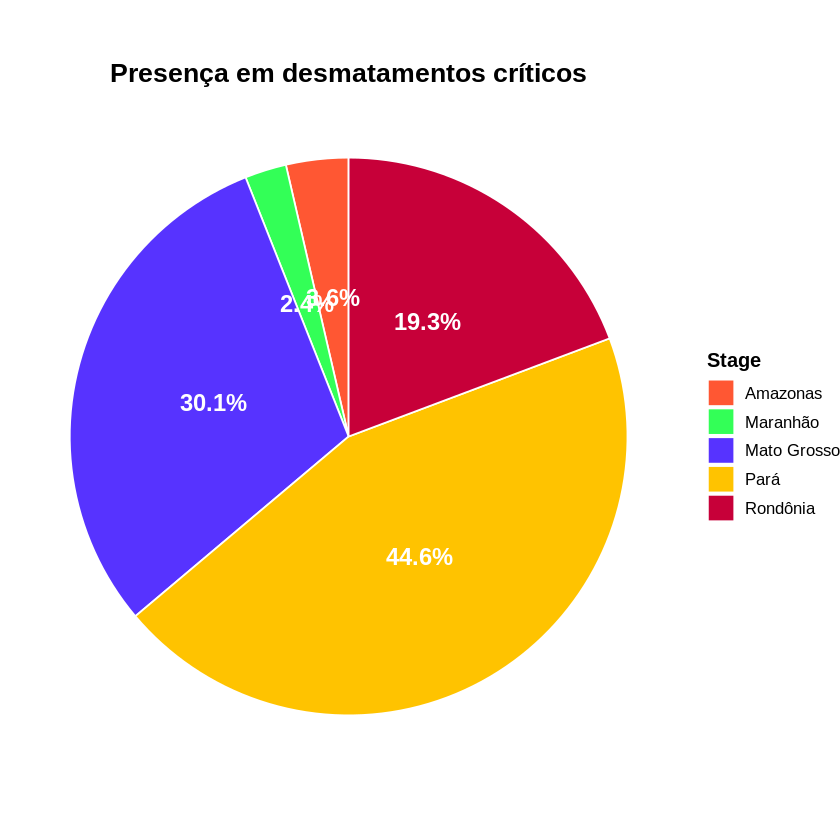

In [ ]:
ggplot(dfm, aes(x = "", y = Count, fill = Stage)) +
  geom_bar(stat = "identity", width = 1, color = "white") +
  coord_polar("y", start = 0) +
  labs(title = "Presença em desmatamentos críticos") +
  theme_void() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
    legend.title = element_text(size = 12, face = "bold"),
    legend.text = element_text(size = 10)
  ) +
  scale_fill_manual(values = c("#FF5733", "#33FF57", "#5733FF", "#FFC300", "#C70039", "#900C3F")) +
  geom_text(aes(label = paste0(round(100 * Count / sum(Count), 1), "%")),
            position = position_stack(vjust = 0.5),
            color = "white", size = 5, fontface = "bold")

In [ ]:
pief.ufa <- table(df.acima$uf)

In [ ]:
dfa <- data.frame(Stage = names(pief.ufa), Count = as.numeric(pief.ufa))

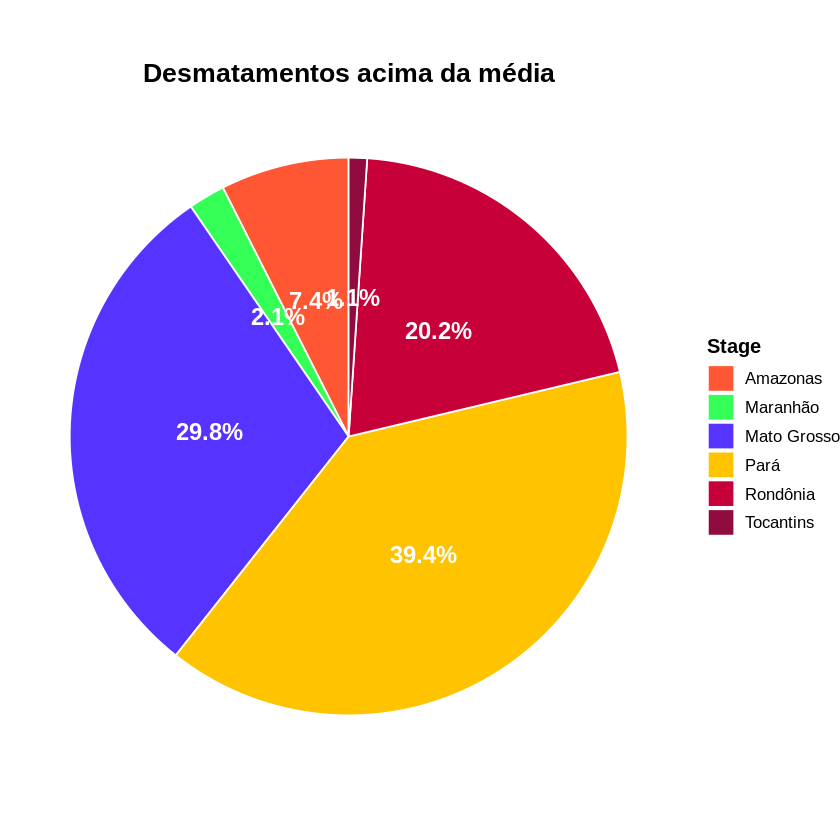

In [ ]:
ggplot(dfa, aes(x = "", y = Count, fill = Stage)) +
  geom_bar(stat = "identity", width = 1, color = "white") +
  coord_polar("y", start = 0) +
  labs(title = "Desmatamentos acima da média") +
  theme_void() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
    legend.title = element_text(size = 12, face = "bold"),
    legend.text = element_text(size = 10)
  ) +
  scale_fill_manual(values = c("#FF5733", "#33FF57", "#5733FF", "#FFC300", "#C70039", "#900C3F")) +
  geom_text(aes(label = paste0(round(100 * Count / sum(Count), 1), "%")),
            position = position_stack(vjust = 0.5),
            color = "white", size = 5, fontface = "bold")

In [ ]:
dt.desmac[dt.desmac$area.km. == 11814, ]
#A max de todos os estados ocorreu em Mato Grosso, no ano de 2004

,year,area.km.,uf
,<int>,<dbl>,<chr>
185,2004,11814,Mato Grosso


In [ ]:
dt.desmac[dt.desmac$area.km. == 240, ]

,year,area.km.,uf
,<int>,<dbl>,<chr>
272,1994,240,Roraima
281,1993,240,Roraima


In [ ]:
dt.desmac[dt.desmac$area.km. == 0, ]
#Amapá teve 7 anos sem registro de desmatamento

,year,area.km.,uf
,<int>,<dbl>,<chr>
7,2024,0,Amapá
205,2002,0,Amapá
223,2000,0,Amapá
232,1999,0,Amapá
259,1996,0,Amapá
271,1994,0,Amapá
286,1993,0,Amapá


In [ ]:
library(ggplot2)

In [ ]:
ggplot(dt.desmac, aes(x = uf, y = area.km., fill = uf)) +
  geom_violin(scale = "width", bw = 0.5, alpha = 0.5, color = "black") +
  geom_boxplot(width = 0.1, fill = "white", color = "black", outlier.shape = 16, outlier.color = "red") +
  scale_fill_viridis_d(option = "plasma", direction = -1) +
  scale_y_log10() +
  theme_minimal(base_size = 14) +
  labs(
    title = "Distribuição do Desmatamento por Estado",
    subtitle = "Análise da dispersão e densidade dos dados (1988-2024)",
    x = "Estados",
    y = "Área Desmatada (km²)"
  ) +
  theme(
    axis.text.x = element_text(angle = 30, hjust = 1, size = 12),
    axis.text.y = element_text(size = 12),
    plot.title = element_text(size = 16, face = "bold"),
    plot.subtitle = element_text(size = 14, face = "italic"),
    legend.position = "none"
  )

ERROR: Error: object 'dt.desmac' not found


In [ ]:
library(dplyr)

In [ ]:
sum(dt.desmac == 0,00)
#Há 7 Rows com observações nulas (não foi egistrado desmatamento no ano todo)

[1] 7

In [ ]:
df.zerodesm <- dt.desmac[dt.desmac$area.km. == 0.00, ]

In [ ]:
df.zerodesm

,year,area.km.,uf
,<int>,<dbl>,<chr>
7,2024,0,Amapá
205,2002,0,Amapá
223,2000,0,Amapá
232,1999,0,Amapá
259,1996,0,Amapá
271,1994,0,Amapá
286,1993,0,Amapá


Observa-se que, todos os anos em que não foram registrados desmatamentos no ano ocorreram no estado do Amapá

In [ ]:
df.amapa <- dt.desmac[dt.desmac$uf == "Amapá", ]

In [ ]:
head(df.amapa)

,year,area.km.,uf
,<int>,<dbl>,<chr>
7,2024,0,Amapá
16,2023,17,Amapá
27,2022,14,Amapá
34,2021,17,Amapá
43,2020,24,Amapá
46,2019,32,Amapá


In [ ]:
summary(df.amapa$area.km.)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   14.00   25.00   45.59   39.00  410.00 

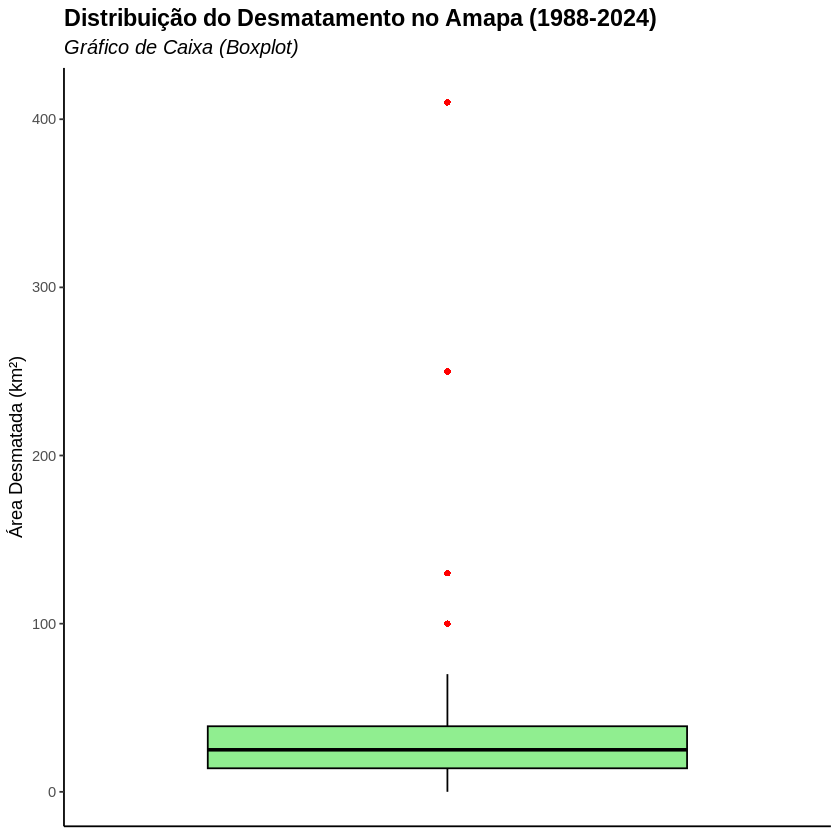

In [ ]:
ggplot(df.amapa, aes(x = "", y = area.km.)) +
  geom_boxplot(fill = "lightgreen", color = "black", outlier.color = "red", outlier.shape = 16) +
  theme_classic() +
  labs(
    x = NULL,
    y = "Área Desmatada (km²)",
    title = "Distribuição do Desmatamento no Amapa (1988-2024)",
    subtitle = "Gráfico de Caixa (Boxplot)"
  ) +
  theme(
    plot.title = element_text(size = 14, face = "bold"),
    plot.subtitle = element_text(size = 12, face = "italic"),
    axis.text.x = element_blank(),
    axis.ticks.x = element_blank()
  )

In [ ]:
df.amapa[df.amapa$area.km. == 410.00, ]
#O pico de Desmatamento no Estado do Amapá ocorreu em 1991

,year,area.km.,uf
,<int>,<dbl>,<chr>
304,1991,410,Amapá


In [ ]:
library(ggplot2)

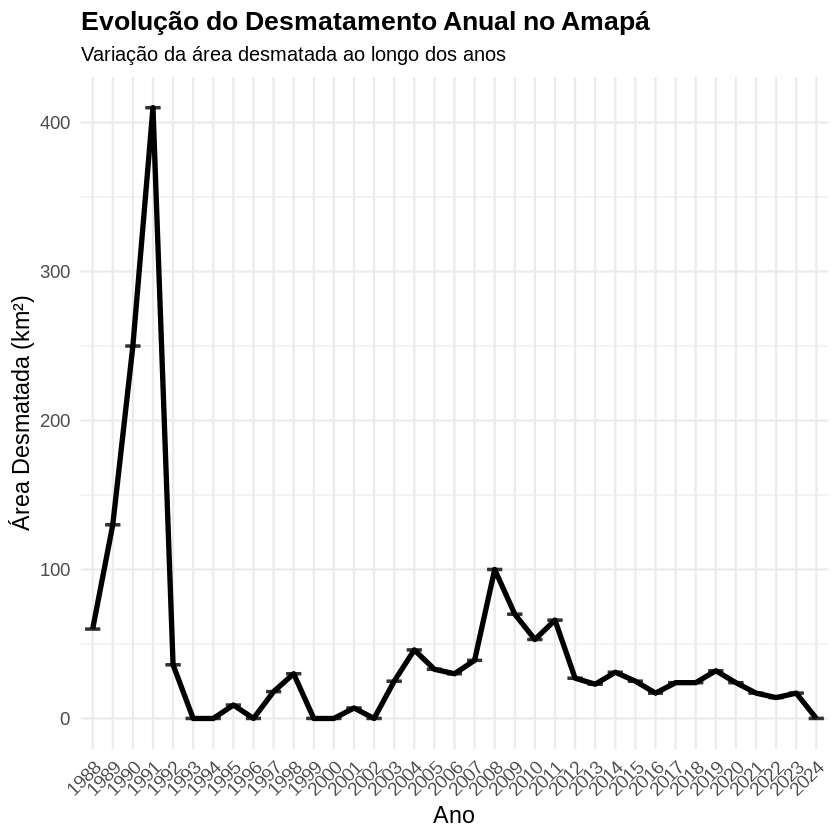

In [ ]:
ggplot(df.amapa, aes(x = factor(year), y = area.km., fill = factor(year))) +
  geom_boxplot(outlier.colour = "black", outlier.shape = 16, outlier.size = 2, alpha = 0.6) +
  stat_summary(fun = median, geom = "line", aes(group = 1), color = "black", size = 1.5, linetype = "solid") +
  scale_y_continuous(labels = scales::comma) +
  labs(
    title = "Evolução do Desmatamento Anual no Amapá",
    subtitle = "Variação da área desmatada ao longo dos anos",
    x = "Ano",
    y = "Área Desmatada (km²)"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    legend.position = "none",
    plot.title = element_text(face = "bold", size = 16),
    plot.subtitle = element_text(size = 12)
  )

#Amapa

##Tendencia Geral:
O desmatamento apresentou um pico alto no final dos anos 1980, seguido por uma queda acentuada nos anos 1990.
Entre 2000 e 2010, houve um aumento moderado, com oscilações.
Após 2010, a tendência geral foi de redução, com pequenas flutuações até 2024

##Pico e Queda:
1988-1991 -> Período de desmatamento elevado, ultrapassando 300 km².

1991-1997 -> Forte queda, chegando a menos de 10 km² no final da década.

2000-2010 -> O desmatamento oscilou, com alguns anos registrando aumentos consideráveis (~100 km²).

2010-2024 -> Predominância de valores menores, sugerindo controle ou redução do desmatamento

##Conclusão:

O padrão deste gráfico reforça a narrativa de que o Amapá tem um dos menores índices de desmatamento.

In [ ]:
df.acre <- dt.desmac[dt.desmac$uf == "Acre", ]

In [ ]:
head(df.acre)

,year,area.km.,uf
,<int>,<dbl>,<chr>
9,2024,448,Acre
18,2023,601,Acre
25,2022,840,Acre
36,2021,889,Acre
45,2020,706,Acre
54,2019,682,Acre


In [ ]:
summary(df.acre$area.km.)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  167.0   309.0   444.0   501.5   601.0  1208.0 

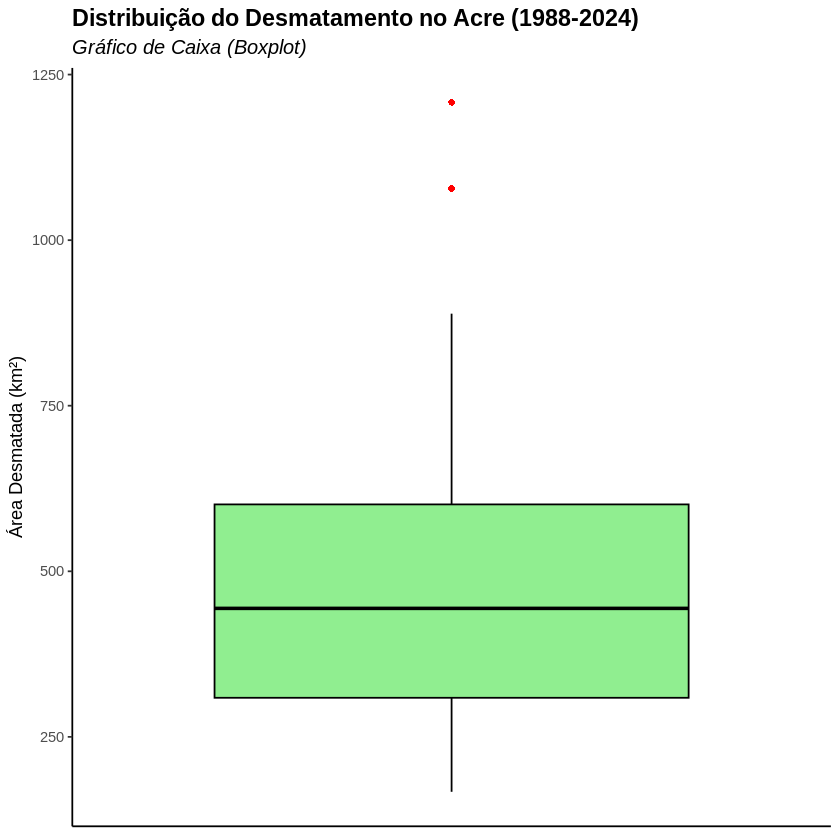

In [ ]:
ggplot(df.acre, aes(x = "", y = area.km.)) +
  geom_boxplot(fill = "lightgreen", color = "black", outlier.color = "red", outlier.shape = 16) +
  theme_classic() +
  labs(
    x = NULL,
    y = "Área Desmatada (km²)",
    title = "Distribuição do Desmatamento no Acre (1988-2024)",
    subtitle = "Gráfico de Caixa (Boxplot)"
  ) +
  theme(
    plot.title = element_text(size = 14, face = "bold"),
    plot.subtitle = element_text(size = 12, face = "italic"),
    axis.text.x = element_blank(),
    axis.ticks.x = element_blank()
  )

Q1 (1º Quartil) = 309.0 -> 25% dos dados estão abaixo de 309 km².

Q2 (Mediana) = 444.0 -> O valor central do conjunto de dados (50% dos valores estão abaixo de 444 km² e 50% acima).

Q3 (3º Quartil) = 601.0 -> 75% dos dados estão abaixo de 601 km².

In [ ]:
df.acre[df.acre$area.km. == 1208.00, ]
#O pico do desmatamento no Acre foi registrado em 1995

,year,area.km.,uf
,<int>,<dbl>,<chr>
270,1995,1208,Acre


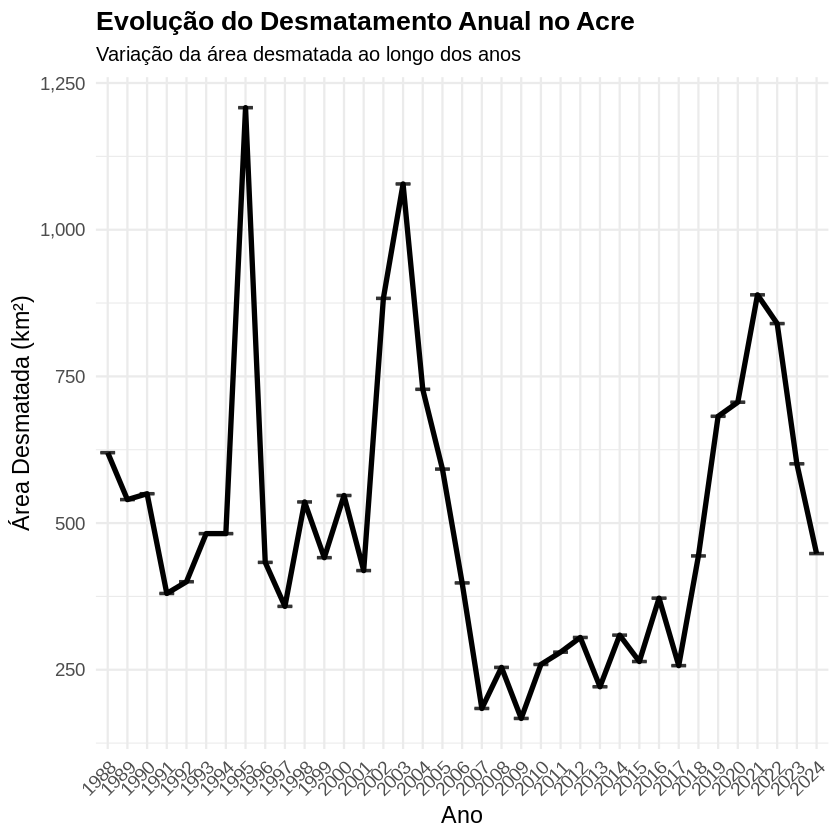

In [ ]:
ggplot(df.acre, aes(x = factor(year), y = area.km., fill = factor(year))) +
  geom_boxplot(outlier.colour = "black", outlier.shape = 16, outlier.size = 2, alpha = 0.6) +
  stat_summary(fun = median, geom = "line", aes(group = 1), color = "black", size = 1.5, linetype = "solid") +
  scale_y_continuous(labels = scales::comma) +
  labs(
    title = "Evolução do Desmatamento Anual no Acre",
    subtitle = "Variação da área desmatada ao longo dos anos",
    x = "Ano",
    y = "Área Desmatada (km²)"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    legend.position = "none",
    plot.title = element_text(face = "bold", size = 16),
    plot.subtitle = element_text(size = 12)
  )

In [ ]:
df.acre[df.acre$year == 2003, ]

,year,area.km.,uf
,<int>,<dbl>,<chr>
198,2003,1078,Acre


In [ ]:
df.acre[df.acre$year == 1995, ]

,year,area.km.,uf
,<int>,<dbl>,<chr>
270,1995,1208,Acre


In [ ]:
df.acre[df.acre$year == 2021, ]

,year,area.km.,uf
,<int>,<dbl>,<chr>
36,2021,889,Acre


#Acre

##Tendencia Geral
O desmatamento no Acre apresenta variações bruscas ao longo do tempo, com períodos de picos seguidos por quedas significativas.

1988-1998 -> Oscilações moderadas, mas com um pico expressivo no final da década de 1990.

1999-2005 -> Redução significativa no desmatamento.

2005-2010 -> Forte aumento, chegando ao maior valor do gráfico (~1100 km²).

2010-2019 -> Queda acentuada e estabilidade em níveis mais baixos.

2019-2024 -> Novo aumento considerável, chegando novamente perto dos 1000 km²

##Picos e quedas
1998-1999 -> O maior pico antes dos anos 2000 pode estar relacionado a mudanças políticas ou econômicas.

2005-2010 -> Período crítico de desmatamento, possivelmente devido à expansão agropecuária.

2010-2019 -> Declínio, indicando possível fortalecimento de políticas de preservação.

2019-2024 -> Aumento expressivo, podendo estar ligado ao enfraquecimento de políticas ambientais

##Conclusão
Diferente do Amapá, o Acre apresenta valores bem mais altos e picos mais acentuados. O desmatamento no Acre frequentemente ultrapassa 500 km², enquanto no Amapá os valores são muito menores.


In [ ]:
df.amazonas <- dt.desmac[dt.desmac$uf == "Amazonas", ]

In [ ]:
head(df.amazonas)

,year,area.km.,uf
,<int>,<dbl>,<chr>
8,2024,1143,Amazonas
17,2023,1610,Amazonas
26,2022,2594,Amazonas
35,2021,2306,Amazonas
44,2020,1512,Amazonas
53,2019,1434,Amazonas


In [ ]:
summary(df.amazonas$area.km.)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  370.0   595.0   788.0   976.7  1180.0  2594.0 

Q1 (1º Quartil) = 595.0 -> 25% dos dados estão abaixo de 595.0 km².

Q2 (Mediana) = 788.0 -> O valor central do conjunto de dados (50% dos valores estão abaixo de 788.0 km² e 50% acima).

Q3 (3º Quartil) = 1180.0 -> 75% dos dados estão abaixo de 1180.0 km².

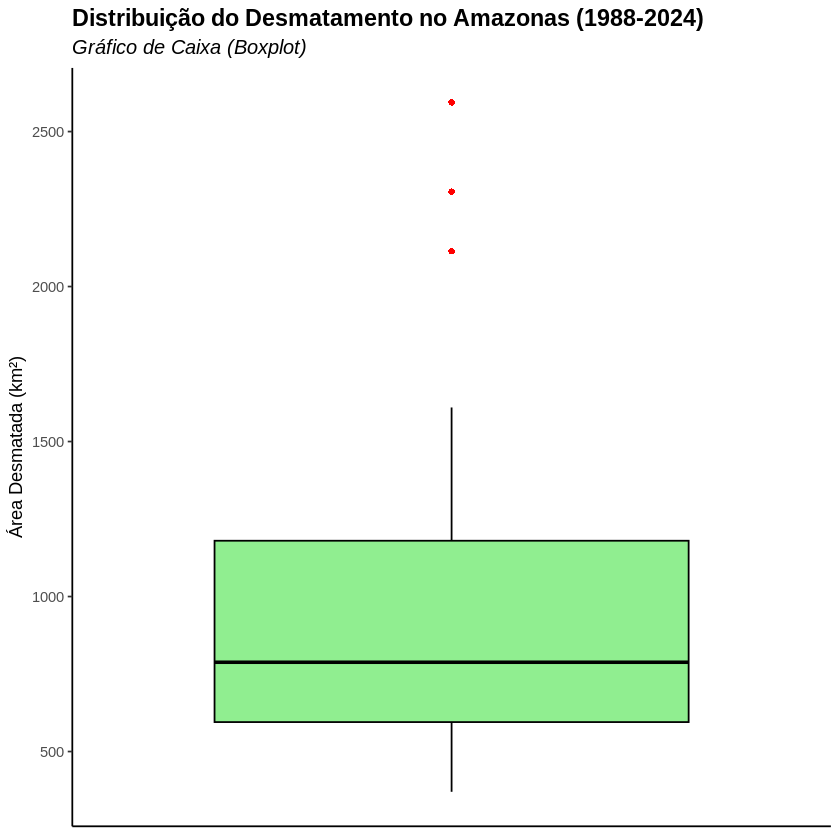

In [ ]:
ggplot(df.amazonas, aes(x = "", y = area.km.)) +
  geom_boxplot(fill = "lightgreen", color = "black", outlier.color = "red", outlier.shape = 16) +
  theme_classic() +
  labs(
    x = NULL,
    y = "Área Desmatada (km²)",
    title = "Distribuição do Desmatamento no Amazonas (1988-2024)",
    subtitle = "Gráfico de Caixa (Boxplot)"
  ) +
  theme(
    plot.title = element_text(size = 14, face = "bold"),
    plot.subtitle = element_text(size = 12, face = "italic"),
    axis.text.x = element_blank(),
    axis.ticks.x = element_blank()
  )

In [ ]:
df.amazonas[df.amazonas$area.km. == 2594.0, ]
#O pico de Desmatamento registrado foi em 2022

,year,area.km.,uf
,<int>,<dbl>,<chr>
26,2022,2594,Amazonas


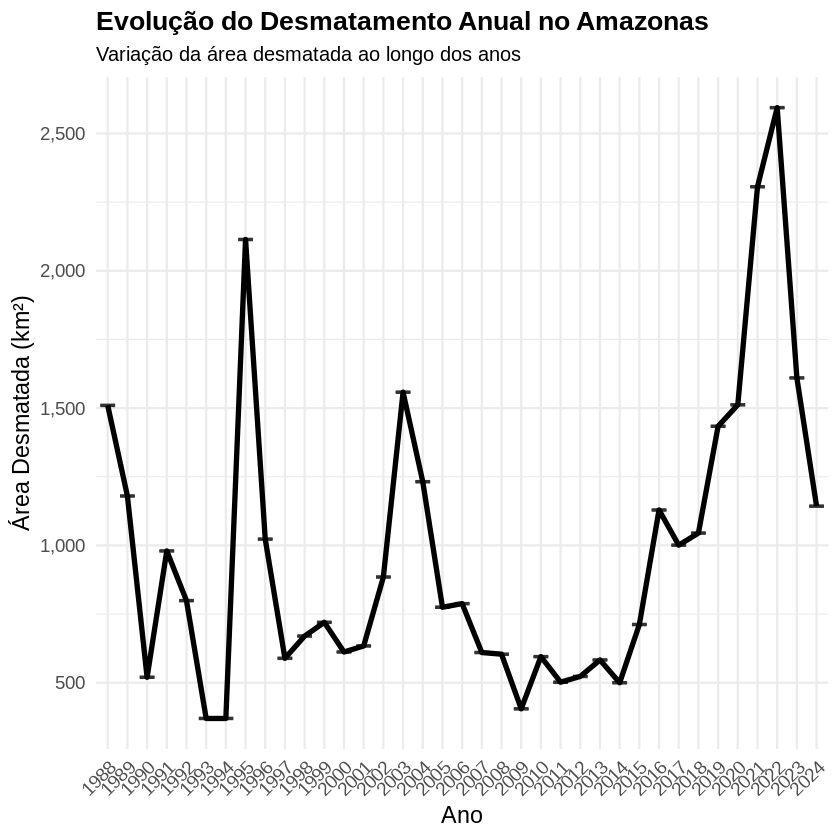

In [ ]:
ggplot(df.amazonas, aes(x = factor(year), y = area.km., fill = factor(year))) +
  geom_boxplot(outlier.colour = "black", outlier.shape = 16, outlier.size = 2, alpha = 0.6) +
  stat_summary(fun = median, geom = "line", aes(group = 1), color = "black", size = 1.5, linetype = "solid") +
  scale_y_continuous(labels = scales::comma) +
  labs(
    title = "Evolução do Desmatamento Anual no Amazonas",
    subtitle = "Variação da área desmatada ao longo dos anos",
    x = "Ano",
    y = "Área Desmatada (km²)"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    legend.position = "none",
    plot.title = element_text(face = "bold", size = 16),
    plot.subtitle = element_text(size = 12)
  )

#Amazonas
##Tendência Geral
O desmatamento no Amazonas apresenta oscilações ao longo do tempo, com períodos de redução seguidos por fortes aumentos, especialmente nos anos mais recentes.

1988-1996 -> Redução progressiva do desmatamento após um pico inicial.

1997-2005 -> Forte crescimento, atingindo o maior valor da série histórica (~2100 km²).

2006-2013 -> Período de queda acentuada, com valores bem menores.

2014-2024 -> Retomada do crescimento, ultrapassando 2000 km² nos últimos anos.
##Picos e Quedas
1995-1996 -> Forte alta seguida de queda brusca, possivelmente relacionada a mudanças políticas.

2003-2005 -> Período crítico de desmatamento, atingindo o maior valor antes de 2020.

2006-2013 -> Fase de controle, possivelmente devido a políticas ambientais mais rígidas.

2014-2024 -> Tendência de alta constante, chegando ao maior valor registrado no período recente.
##Conclusão
Diferente do Amapá e do Acre, o Amazonas apresenta valores significativamente mais altos de desmatamento. Nos últimos anos, o crescimento acelerado torna o estado um dos principais focos de preocupação ambiental na região amazônica.

In [ ]:
df.maranhao <- dt.desmac[dt.desmac$uf == "Maranhão", ]

In [ ]:
head(df.maranhao)

,year,area.km.,uf
,<int>,<dbl>,<chr>
6,2024,287,Maranhão
15,2023,306,Maranhão
24,2022,271,Maranhão
33,2021,350,Maranhão
42,2020,336,Maranhão
51,2019,237,Maranhão


In [ ]:
summary(df.maranhao$area.km.)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  209.0   306.0   670.0   728.8  1061.0  2450.0 

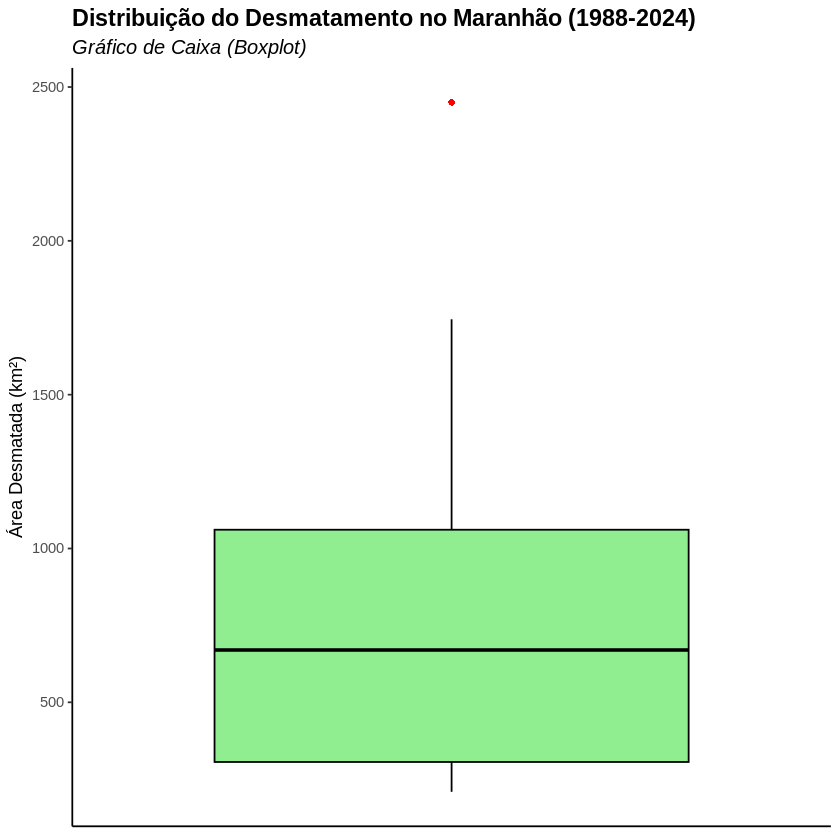

In [ ]:
ggplot(df.maranhao, aes(x = "", y = area.km.)) +
  geom_boxplot(fill = "lightgreen", color = "black", outlier.color = "red", outlier.shape = 16) +
  theme_classic() +
  labs(
    x = NULL,
    y = "Área Desmatada (km²)",
    title = "Distribuição do Desmatamento no Maranhão (1988-2024)",
    subtitle = "Gráfico de Caixa (Boxplot)"
  ) +
  theme(
    plot.title = element_text(size = 14, face = "bold"),
    plot.subtitle = element_text(size = 12, face = "italic"),
    axis.text.x = element_blank(),
    axis.ticks.x = element_blank()
  )

In [ ]:
df.maranhao[df.maranhao$area.km. == 2450.0, ]
#Pico Registrado em 1988

,year,area.km.,uf
,<int>,<dbl>,<chr>
330,1988,2450,Maranhão


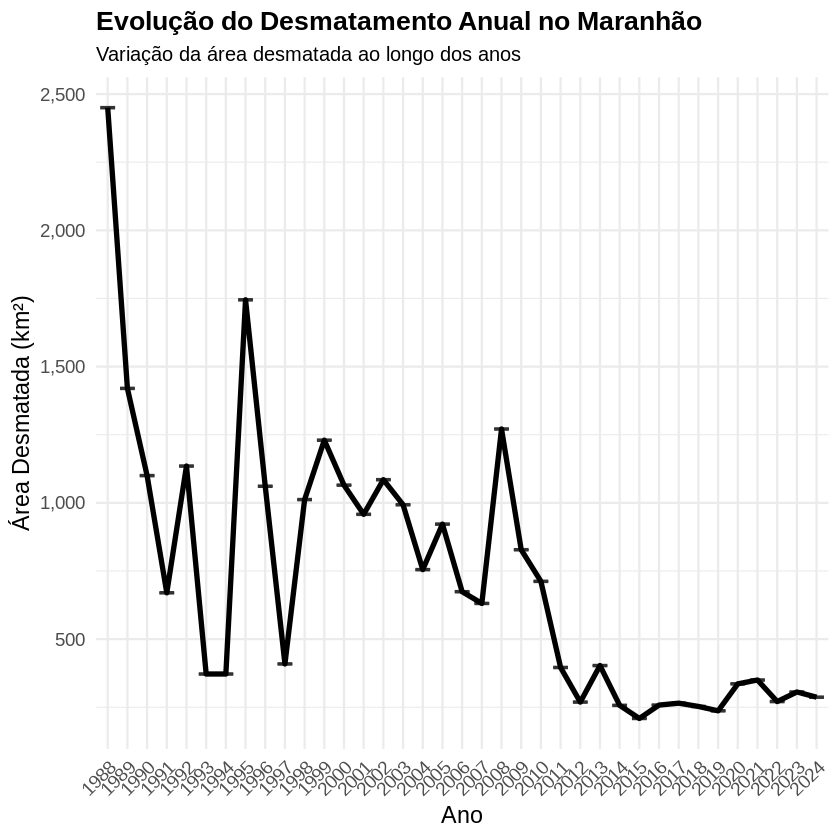

In [ ]:
ggplot(df.maranhao, aes(x = factor(year), y = area.km., fill = factor(year))) +
  geom_boxplot(outlier.colour = "black", outlier.shape = 16, outlier.size = 2, alpha = 0.6) +
  stat_summary(fun = median, geom = "line", aes(group = 1), color = "black", size = 1.5, linetype = "solid") +
  scale_y_continuous(labels = scales::comma) +
  labs(
    title = "Evolução do Desmatamento Anual no Maranhão",
    subtitle = "Variação da área desmatada ao longo dos anos",
    x = "Ano",
    y = "Área Desmatada (km²)"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    legend.position = "none",
    plot.title = element_text(face = "bold", size = 16),
    plot.subtitle = element_text(size = 12)
  )

#Maranhão
##Tendência Geral
O desmatamento no Maranhão apresenta uma trajetória de queda ao longo do tempo, com oscilações significativas antes de se estabilizar em níveis mais baixos.

1988-1998 -> Altos níveis de desmatamento, com forte variação entre anos.

1999-2008 -> Manutenção de valores elevados, com picos acima de 1000 km².

2009-2015 -> Forte declínio, com valores reduzidos para menos de 300 km².

2016-2024 -> Estabilização em um patamar mais baixo, embora com algumas oscilações.
##Picos e Quedas
1988-1990 -> Alta significativa, com valores acima de 1200 km².

1993-1995 -> Queda brusca, seguida por nova alta.

2003-2008 -> Período de desmatamento elevado, mantendo valores próximos a 1000 km².

2009-2015 -> Redução intensa, possivelmente devido a políticas ambientais mais rígidas.

2020-2023 -> Pequeno aumento, mas sem retomada dos patamares antigos.
##Conclusão
O Maranhão teve um histórico de altos índices de desmatamento, especialmente até 2008. No entanto, a partir de 2010, houve uma queda significativa, e os valores recentes indicam estabilização em um nível muito menor do que no passado.

In [ ]:
df.matogrosso <- dt.desmac[dt.desmac$uf == "Mato Grosso", ]

In [ ]:
dim(df.matogrosso)

[1] 37  3

In [ ]:
head(df.matogrosso)

,year,area.km.,uf
,<int>,<dbl>,<chr>
5,2024,1264,Mato Grosso
14,2023,2048,Mato Grosso
23,2022,1927,Mato Grosso
32,2021,2213,Mato Grosso
41,2020,1779,Mato Grosso
50,2019,1702,Mato Grosso


In [ ]:
summary(df.matogrosso$area.km.)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    757    1561    3258    4200    6369   11814 

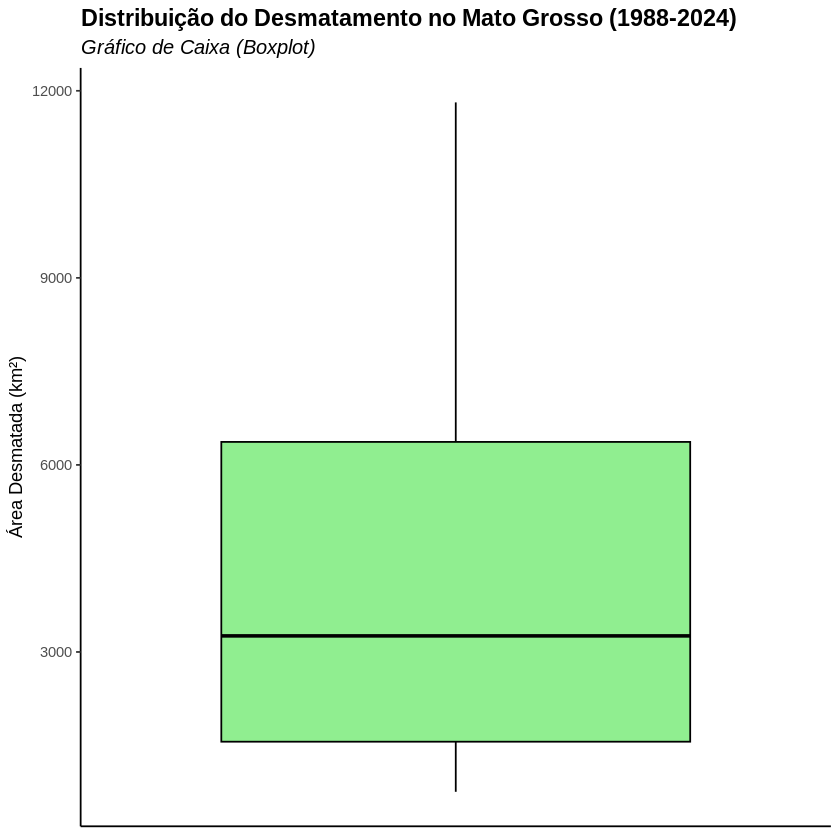

In [ ]:
ggplot(df.matogrosso, aes(x = "", y = area.km.)) +
  geom_boxplot(fill = "lightgreen", color = "black", outlier.color = "red", outlier.shape = 16) +
  theme_classic() +
  labs(
    x = NULL,
    y = "Área Desmatada (km²)",
    title = "Distribuição do Desmatamento no Mato Grosso (1988-2024)",
    subtitle = "Gráfico de Caixa (Boxplot)"
  ) +
  theme(
    plot.title = element_text(size = 14, face = "bold"),
    plot.subtitle = element_text(size = 12, face = "italic"),
    axis.text.x = element_blank(),
    axis.ticks.x = element_blank()
  )

In [ ]:
df.matogrosso[df.matogrosso$area.km. == 11814, ]
#O pico foi em 2004

,year,area.km.,uf
,<int>,<dbl>,<chr>
185,2004,11814,Mato Grosso


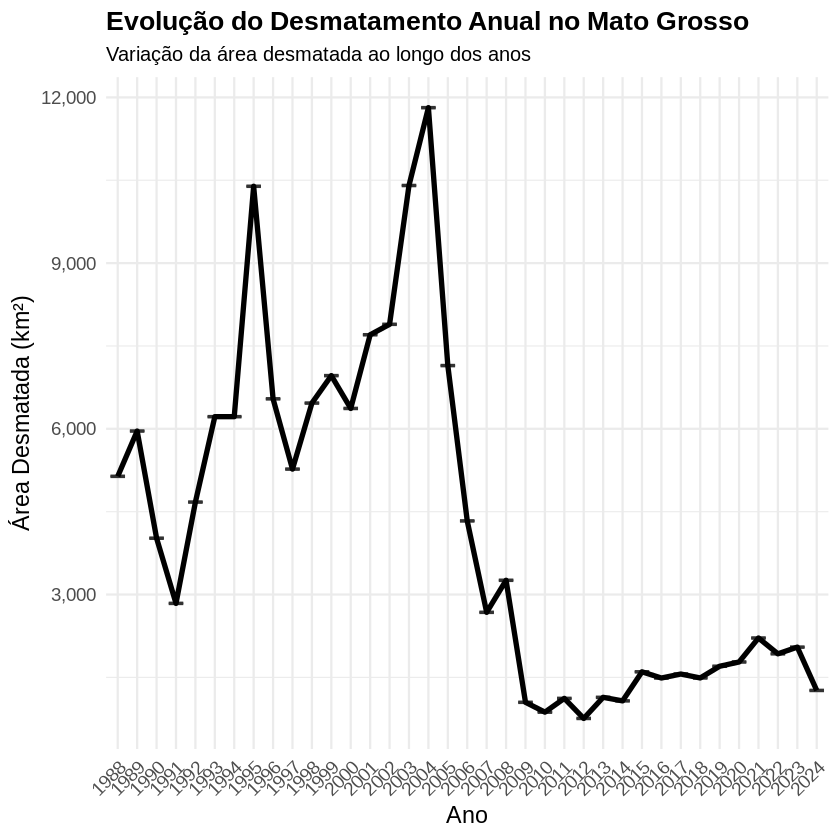

In [ ]:
ggplot(df.matogrosso, aes(x = factor(year), y = area.km., fill = factor(year))) +
  geom_boxplot(outlier.colour = "black", outlier.shape = 16, outlier.size = 2, alpha = 0.6) +
  stat_summary(fun = median, geom = "line", aes(group = 1), color = "black", size = 1.5, linetype = "solid") +
  scale_y_continuous(labels = scales::comma) +
  labs(
    title = "Evolução do Desmatamento Anual no Mato Grosso",
    subtitle = "Variação da área desmatada ao longo dos anos",
    x = "Ano",
    y = "Área Desmatada (km²)"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    legend.position = "none",
    plot.title = element_text(face = "bold", size = 16),
    plot.subtitle = element_text(size = 12)
  )

#Mato Grosso
##Tendência Geral
O desmatamento no Mato Grosso apresenta uma trajetória marcada por um grande crescimento até meados dos anos 2000, seguido por uma forte redução e posterior estabilização em um nível mais baixo.

1988-1997 -> Crescimento progressivo, com oscilações moderadas.

1998-2005 -> Período de pico, com valores acima de 10.000 km² em alguns anos.

2006-2012 -> Redução drástica, com queda para menos de 1.000 km².

2013-2024 -> Retomada do crescimento, mas sem atingir os patamares anteriores.
##Picos e Quedas

1998-2005 -> Período crítico, com recordes sucessivos de desmatamento.

2006-2012 -> Queda significativa, indicando forte influência de políticas ambientais.

2013-2024 -> Aumento gradual, mas sem alcançar os valores de antes de 2005.
##Conclusão
O Mato Grosso foi um dos estados com maior desmatamento histórico, especialmente no início dos anos 2000. No entanto, a partir de 2006, o desmatamento caiu drasticamente, possivelmente devido a medidas ambientais mais rígidas. Nos últimos anos, há sinais de aumento progressivo, mas ainda longe dos recordes anteriores.

In [ ]:
df.para <- dt.desmac[dt.desmac$uf == "Pará", ]

In [ ]:
head(df.para)

,year,area.km.,uf
,<int>,<dbl>,<chr>
4,2024,2362,Pará
10,2023,3299,Pará
22,2022,4162,Pará
31,2021,5238,Pará
40,2020,4899,Pará
49,2019,4172,Pará


In [ ]:
summary(df.para$area.km.)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1741    3299    4284    4660    5750    8870 

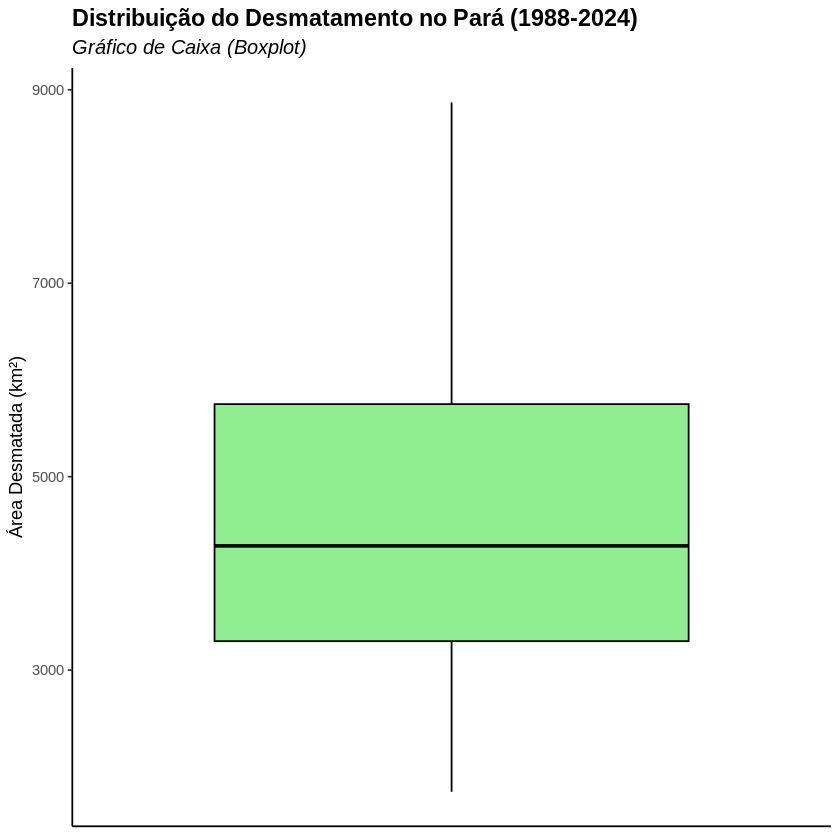

In [ ]:
ggplot(df.para, aes(x = "", y = area.km.)) +
  geom_boxplot(fill = "lightgreen", color = "black", outlier.color = "red", outlier.shape = 16) +
  theme_classic() +
  labs(
    x = NULL,
    y = "Área Desmatada (km²)",
    title = "Distribuição do Desmatamento no Pará (1988-2024)",
    subtitle = "Gráfico de Caixa (Boxplot)"
  ) +
  theme(
    plot.title = element_text(size = 14, face = "bold"),
    plot.subtitle = element_text(size = 12, face = "italic"),
    axis.text.x = element_blank(),
    axis.ticks.x = element_blank()
  )

In [ ]:
df.para[df.para$area.km. == 8870, ]
#Pico registrado em 2004

,year,area.km.,uf
,<int>,<dbl>,<chr>
184,2004,8870,Pará


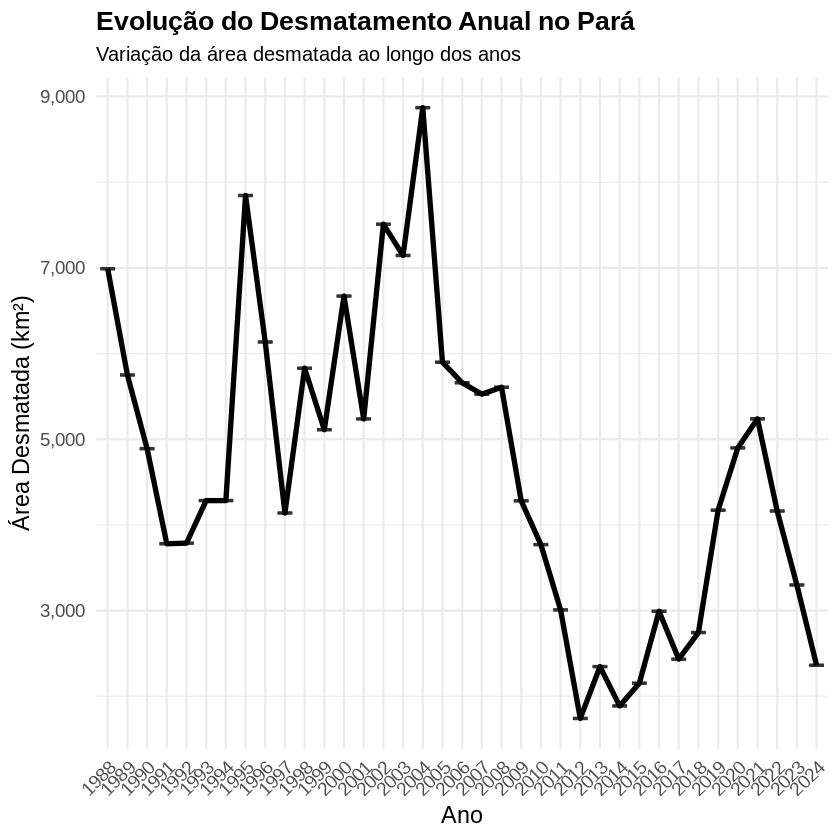

In [ ]:
ggplot(df.para, aes(x = factor(year), y = area.km., fill = factor(year))) +
  geom_boxplot(outlier.colour = "black", outlier.shape = 16, outlier.size = 2, alpha = 0.6) +
  stat_summary(fun = median, geom = "line", aes(group = 1), color = "black", size = 1.5, linetype = "solid") +
  scale_y_continuous(labels = scales::comma) +
  labs(
    title = "Evolução do Desmatamento Anual no Pará",
    subtitle = "Variação da área desmatada ao longo dos anos",
    x = "Ano",
    y = "Área Desmatada (km²)"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    legend.position = "none",
    plot.title = element_text(face = "bold", size = 16),
    plot.subtitle = element_text(size = 12)
  )

#Pará
##Tendência Geral
O desmatamento no Pará apresenta grandes variações ao longo do tempo, com períodos de crescimento intenso seguidos por quedas acentuadas.

1988-1996 -> Alta volatilidade, com valores variando entre 3.000 km² e 7.000 km².

1997-2004 -> Forte crescimento, atingindo picos acima de 9.000 km².

2005-2012 -> Redução expressiva, chegando ao menor nível da série (~1.500 km²).

2013-2018 -> Estabilidade em patamares baixos, abaixo de 3.000 km².

2019-2024 -> Novo aumento significativo, ultrapassando os 5.000 km² novamente.
##Picos e Quedas

1997-2004 -> Expansão acelerada do desmatamento, provavelmente ligada à intensificação da atividade agropecuária.

2005-2012 -> Forte declínio, possivelmente impulsionado por políticas ambientais mais rígidas.

2019-2024 -> Retomada do crescimento, podendo estar relacionada a mudanças políticas e econômicas.
##Conclusão
O Pará apresenta valores de desmatamento historicamente altos, superando 9.000 km² nos períodos mais críticos. Após uma grande redução até 2012, houve um aumento recente, o que destaca a necessidade de monitoramento contínuo.

In [ ]:
df.rondonia <- dt.desmac[dt.desmac$uf == "Rondônia", ]

In [ ]:
head(df.rondonia)

,year,area.km.,uf
,<int>,<dbl>,<chr>
3,2024,325,Rondônia
12,2023,867,Rondônia
21,2022,1480,Rondônia
30,2021,1673,Rondônia
39,2020,1273,Rondônia
48,2019,1257,Rondônia


In [ ]:
summary(df.rondonia$area.km.)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    325    1110    1611    1819    2432    4730 

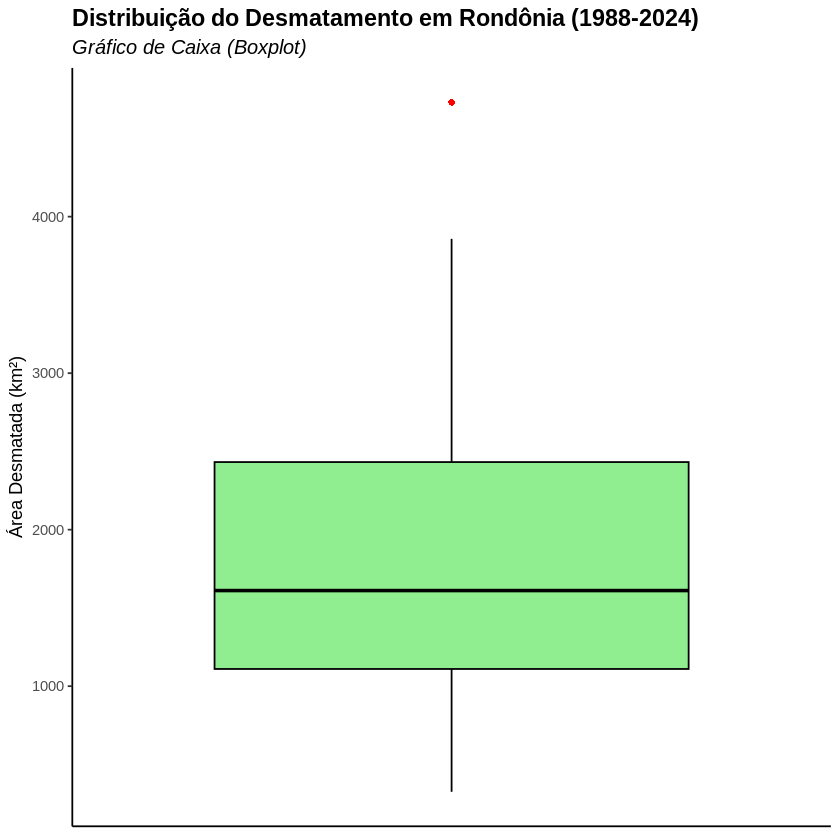

In [ ]:
ggplot(df.rondonia, aes(x = "", y = area.km.)) +
  geom_boxplot(fill = "lightgreen", color = "black", outlier.color = "red", outlier.shape = 16) +
  theme_classic() +
  labs(
    x = NULL,
    y = "Área Desmatada (km²)",
    title = "Distribuição do Desmatamento em Rondônia (1988-2024)",
    subtitle = "Gráfico de Caixa (Boxplot)"
  ) +
  theme(
    plot.title = element_text(size = 14, face = "bold"),
    plot.subtitle = element_text(size = 12, face = "italic"),
    axis.text.x = element_blank(),
    axis.ticks.x = element_blank()
  )

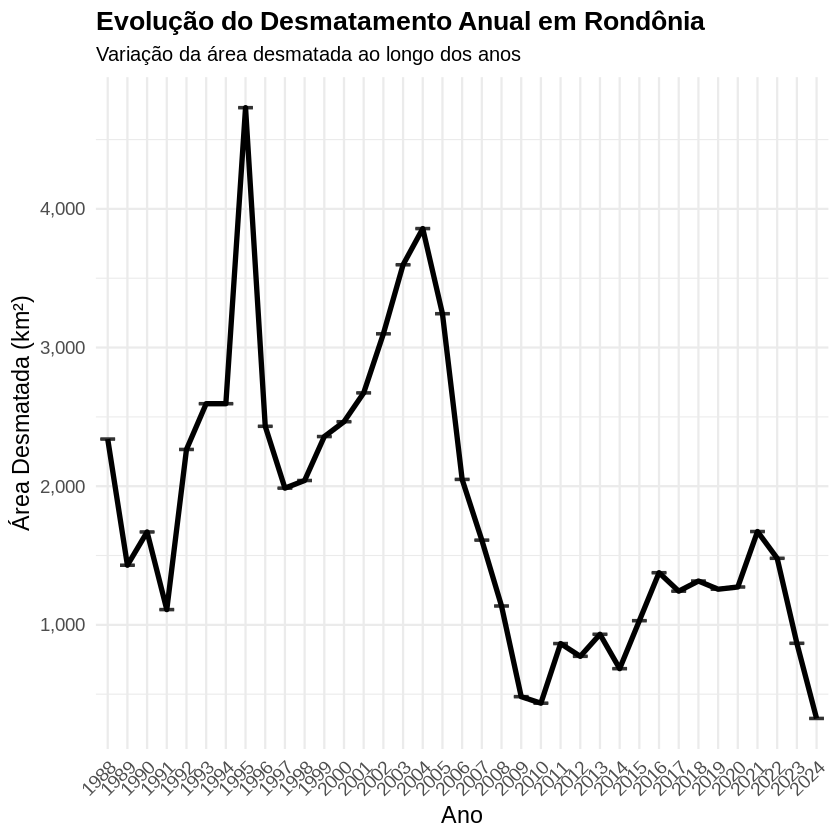

In [ ]:
ggplot(df.rondonia, aes(x = factor(year), y = area.km., fill = factor(year))) +
  geom_boxplot(outlier.colour = "black", outlier.shape = 16, outlier.size = 2, alpha = 0.6) +
  stat_summary(fun = median, geom = "line", aes(group = 1), color = "black", size = 1.5, linetype = "solid") +
  scale_y_continuous(labels = scales::comma) +
  labs(
    title = "Evolução do Desmatamento Anual em Rondônia",
    subtitle = "Variação da área desmatada ao longo dos anos",
    x = "Ano",
    y = "Área Desmatada (km²)"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    legend.position = "none",
    plot.title = element_text(face = "bold", size = 16),
    plot.subtitle = element_text(size = 12)
  )

#Rondônia
##Tendência Geral
O desmatamento em Rondônia apresenta um padrão de crescimento, queda e recuperação ao longo dos anos.

1988-1995 -> Período instável, variando entre 1.000 km² e 2.500 km².

1996-2001 -> Forte crescimento, atingindo um pico acima de 4.500 km².

2002-2012 -> Queda acentuada, chegando a valores inferiores a 500 km².

2013-2024 -> Nova tendência de crescimento, atingindo picos acima de 2.500 km².
##Picos e Quedas
1998-2001 -> Expansão rápida do desmatamento, indicando forte pressão sobre a floresta.

2005-2012 -> Grande declínio, possivelmente ligado a políticas ambientais mais rigorosas.

2016-2023 -> Recuperação do desmatamento, atingindo novamente patamares elevados.
##Conclusão
O desmatamento em Rondônia teve um declínio expressivo após 2005, mas voltou a crescer nos últimos anos. O aumento recente indica a necessidade de reforçar políticas de controle e fiscalização para evitar novos avanços da degradação florestal.

In [ ]:
df.roraima <- dt.desmac[dt.desmac$uf == "Roraima", ]

In [ ]:
head(df.roraima)

,year,area.km.,uf
,<int>,<dbl>,<chr>
2,2024,436,Roraima
11,2023,284,Roraima
20,2022,279,Roraima
29,2021,315,Roraima
38,2020,297,Roraima
47,2019,590,Roraima


In [ ]:
summary(df.roraima$area.km.)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   84.0   184.0   240.0   267.8   309.0   630.0 

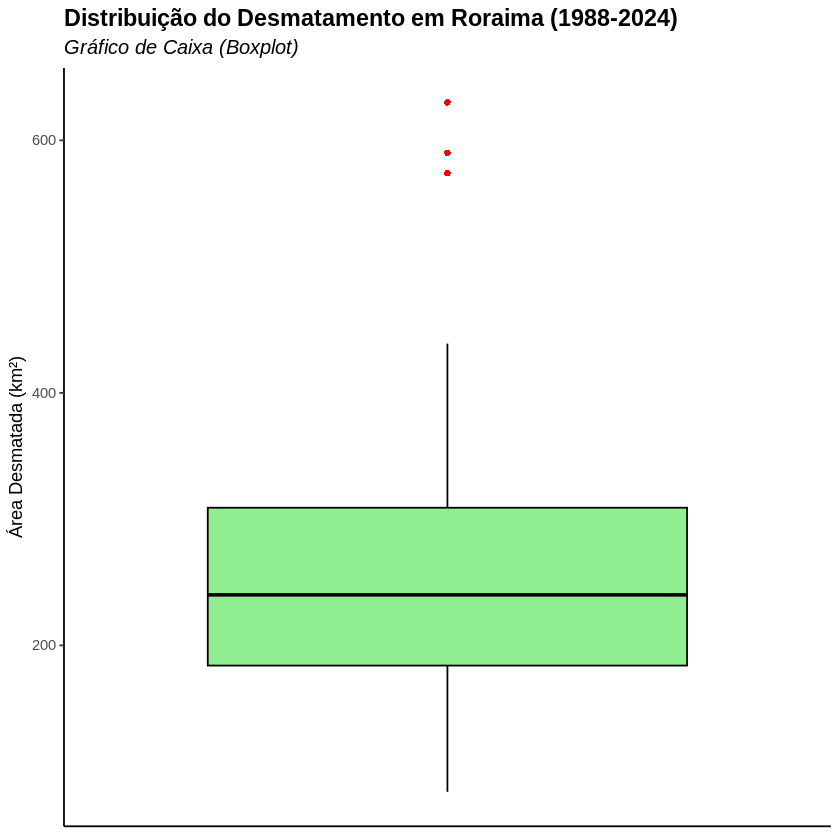

In [ ]:
ggplot(df.roraima, aes(x = "", y = area.km.)) +
  geom_boxplot(fill = "lightgreen", color = "black", outlier.color = "red", outlier.shape = 16) +
  theme_classic() +
  labs(
    x = NULL,
    y = "Área Desmatada (km²)",
    title = "Distribuição do Desmatamento em Roraima (1988-2024)",
    subtitle = "Gráfico de Caixa (Boxplot)"
  ) +
  theme(
    plot.title = element_text(size = 14, face = "bold"),
    plot.subtitle = element_text(size = 12, face = "italic"),
    axis.text.x = element_blank(),
    axis.ticks.x = element_blank()
  )

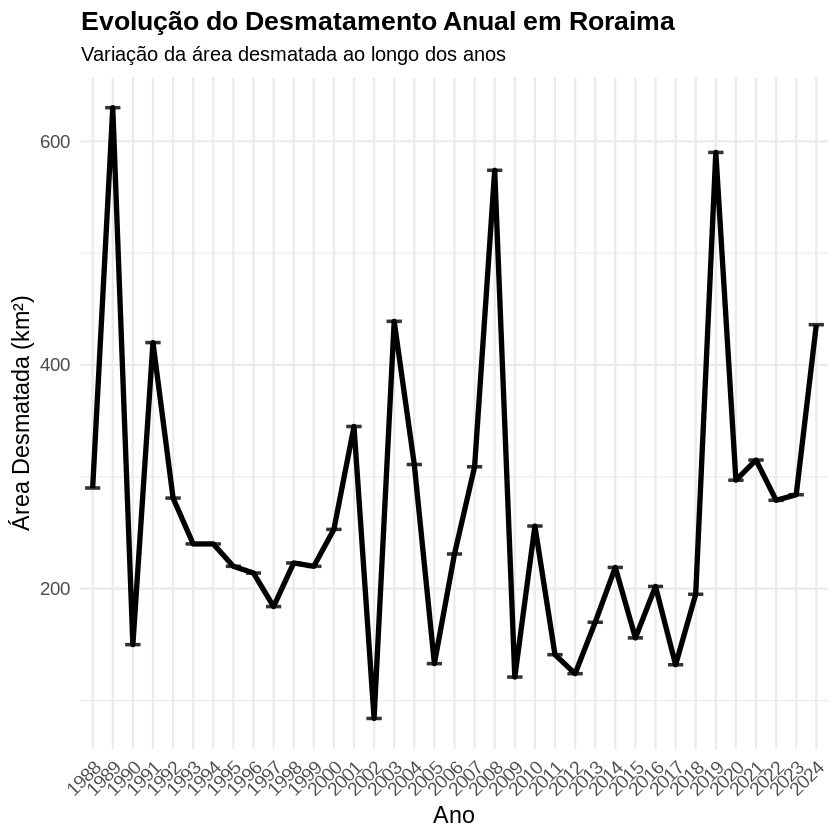

In [ ]:
ggplot(df.roraima, aes(x = factor(year), y = area.km., fill = factor(year))) +
  geom_boxplot(outlier.colour = "black", outlier.shape = 16, outlier.size = 2, alpha = 0.6) +
  stat_summary(fun = median, geom = "line", aes(group = 1), color = "black", size = 1.5, linetype = "solid") +
  scale_y_continuous(labels = scales::comma) +
  labs(
    title = "Evolução do Desmatamento Anual em Roraima",
    subtitle = "Variação da área desmatada ao longo dos anos",
    x = "Ano",
    y = "Área Desmatada (km²)"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    legend.position = "none",
    plot.title = element_text(face = "bold", size = 16),
    plot.subtitle = element_text(size = 12)
  )

#Roraima
##Tendência Geral
O desmatamento em Roraima apresenta grande variação ao longo dos anos, sem um padrão de longo prazo bem definido.

1988-1995 -> Período de altos e baixos, com picos acima de 600 km².

1996-2010 -> Flutuação intensa, com anos de baixo desmatamento alternando com picos acima de 400 km².

2011-2018 -> Período de menor desmatamento, oscilando entre 100 e 300 km².

2019-2024 -> Retomada do crescimento, com valores acima de 600 km².
##Picos e Quedas
1988-1990 -> Alto desmatamento inicial, possivelmente devido à expansão agropecuária.

2003-2005 -> Forte aumento, seguido de declínio.

2019-2021 -> Crescimento expressivo, atingindo valores máximos da série.
##Conclusão
O desmatamento em Roraima se caracteriza por flutuações bruscas e períodos de crescimento seguidos de quedas. No entanto, os últimos anos indicam um aumento preocupante, reforçando a necessidade de monitoramento contínuo e políticas de conservação mais eficazes.

In [ ]:
df.tocantins <- dt.desmac[dt.desmac$uf == "Tocantins", ]

In [ ]:
head(df.tocantins)

,year,area.km.,uf
,<int>,<dbl>,<chr>
1,2024,23,Tocantins
13,2023,32,Tocantins
19,2022,27,Tocantins
28,2021,37,Tocantins
37,2020,25,Tocantins
52,2019,23,Tocantins


In [ ]:
summary(df.tocantins$area.km.)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   23.0    49.0   124.0   239.1   320.0  1650.0 

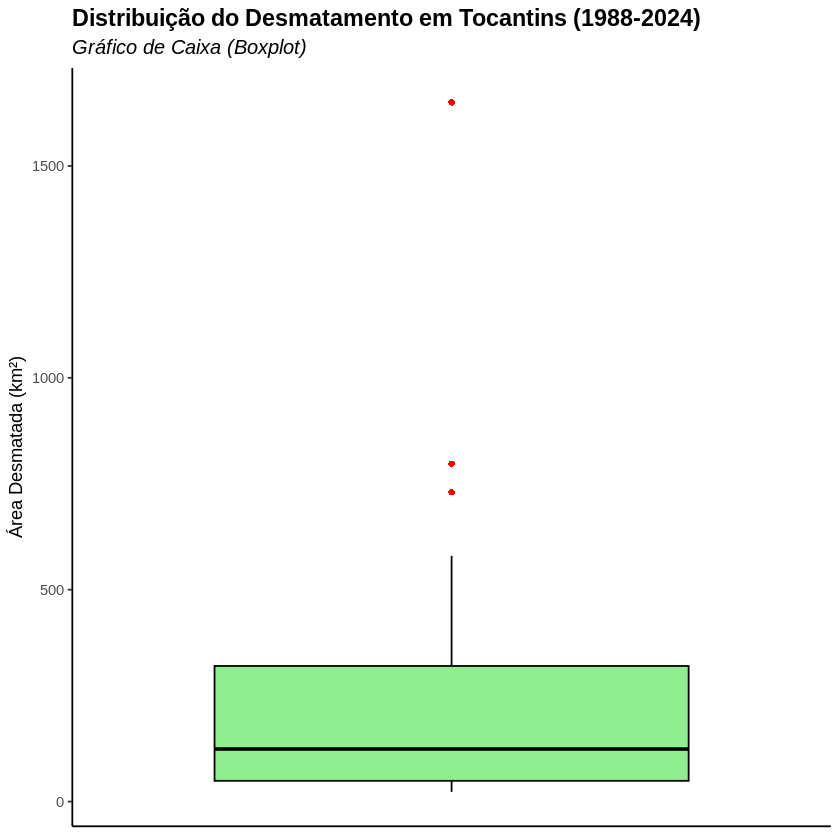

In [ ]:
ggplot(df.tocantins, aes(x = "", y = area.km.)) +
  geom_boxplot(fill = "lightgreen", color = "black", outlier.color = "red", outlier.shape = 16) +
  theme_classic() +
  labs(
    x = NULL,
    y = "Área Desmatada (km²)",
    title = "Distribuição do Desmatamento em Tocantins (1988-2024)",
    subtitle = "Gráfico de Caixa (Boxplot)"
  ) +
  theme(
    plot.title = element_text(size = 14, face = "bold"),
    plot.subtitle = element_text(size = 12, face = "italic"),
    axis.text.x = element_blank(),
    axis.ticks.x = element_blank()
  )

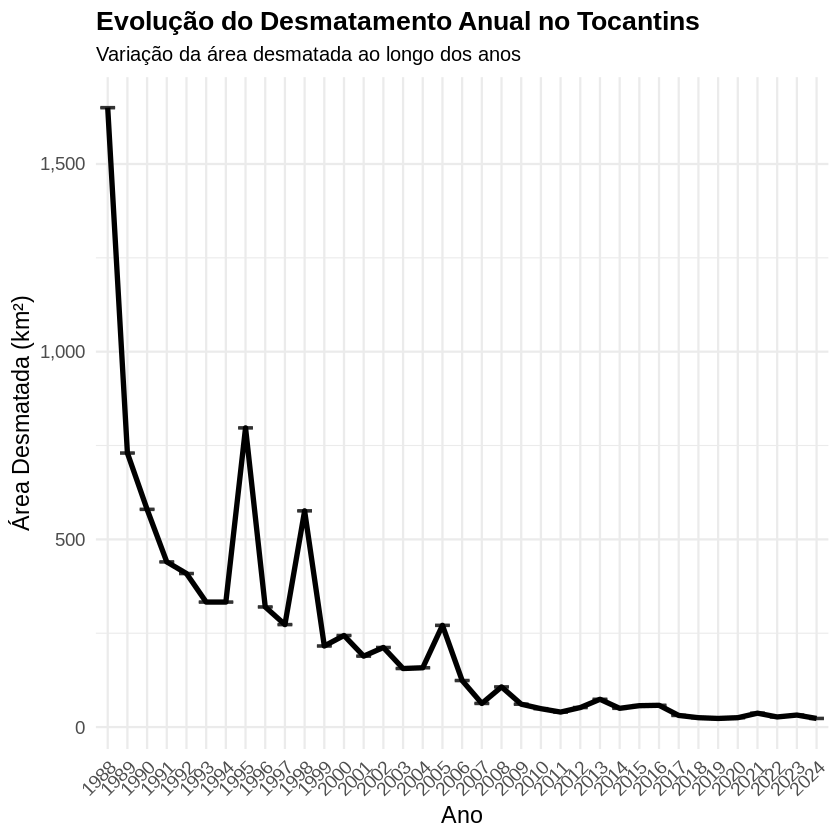

In [ ]:
ggplot(df.tocantins, aes(x = factor(year), y = area.km., fill = factor(year))) +
  geom_boxplot(outlier.colour = "black", outlier.shape = 16, outlier.size = 2, alpha = 0.6) +
  stat_summary(fun = median, geom = "line", aes(group = 1), color = "black", size = 1.5, linetype = "solid") +
  scale_y_continuous(labels = scales::comma) +
  labs(
    title = "Evolução do Desmatamento Anual no Tocantins",
    subtitle = "Variação da área desmatada ao longo dos anos",
    x = "Ano",
    y = "Área Desmatada (km²)"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    legend.position = "none",
    plot.title = element_text(face = "bold", size = 16),
    plot.subtitle = element_text(size = 12)
  )

#Tocantins
##Tendência Geral
O desmatamento no Tocantins mostra uma queda acentuada desde 1988, com estabilização nos últimos anos.

1988-1995 -> Forte declínio, de mais de 1.500 km² para menos de 500 km².

1996-2005 -> Oscilações, com alguns picos, mas mantendo a tendência de queda.

2006-2024 -> Níveis baixos e estáveis, geralmente abaixo de 100 km².
##Picos e Quedas
1988-1990 -> Máximos históricos de desmatamento.

1996-1999 -> Picos isolados, mas sem reversão da tendência de queda.

2005-2007 -> Últimos anos com variações mais significativas antes da estabilização.
##Conclusão
O Tocantins apresenta uma redução expressiva do desmatamento ao longo das décadas, alcançando um patamar estável e baixo nos anos recentes. Isso sugere que políticas de controle podem ter sido mais eficazes na região.

In [ ]:
library(RColorBrewer)

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”


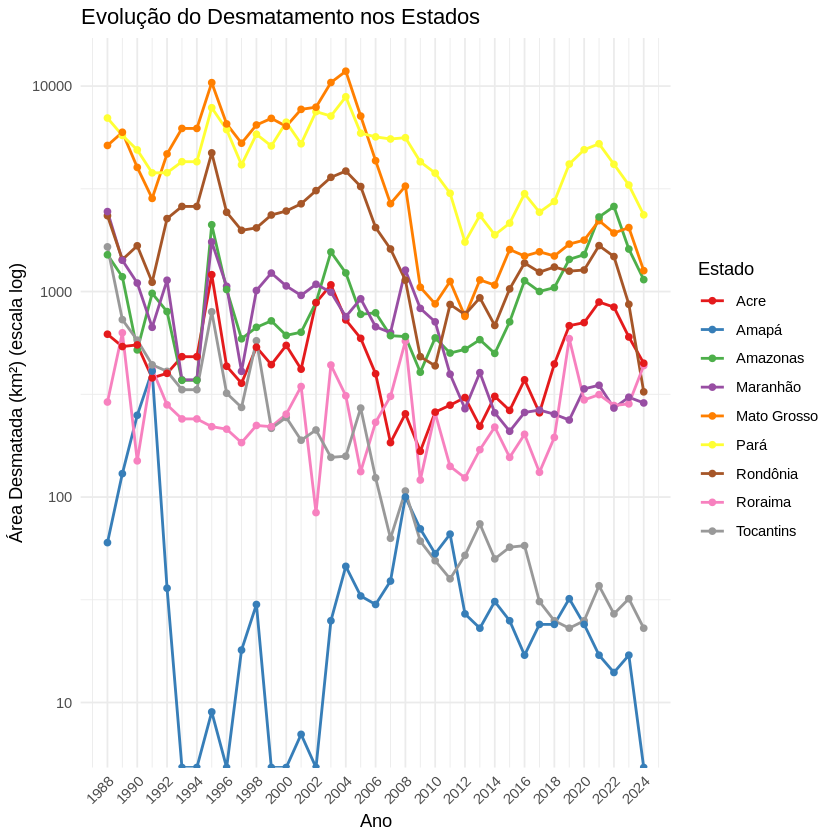

In [ ]:
ggplot(dt.desmac, aes(x = year, y = area.km., color = uf, group = uf)) +
  geom_line(size = 0.8) +
  geom_point(size = 1.5) +
  scale_y_log10() +
  scale_x_continuous(breaks = seq(min(dt.desmac$year), max(dt.desmac$year), by = 2)) +
  scale_color_brewer(palette = "Set1") +
  labs(title = "Evolução do Desmatamento nos Estados",
       x = "Ano",
       y = "Área Desmatada (km²) (escala log)",
       color = "Estado") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [ ]:
dt.desmac[dt.desmac$year == 1995, ]
#O que aconteceu em 1995?

,year,area.km.,uf
,<int>,<dbl>,<chr>
262,1995,797,Tocantins
263,1995,220,Roraima
264,1995,4730,Rondônia
265,1995,7845,Pará
266,1995,10391,Mato Grosso
267,1995,1745,Maranhão
268,1995,9,Amapá
269,1995,2114,Amazonas
270,1995,1208,Acre


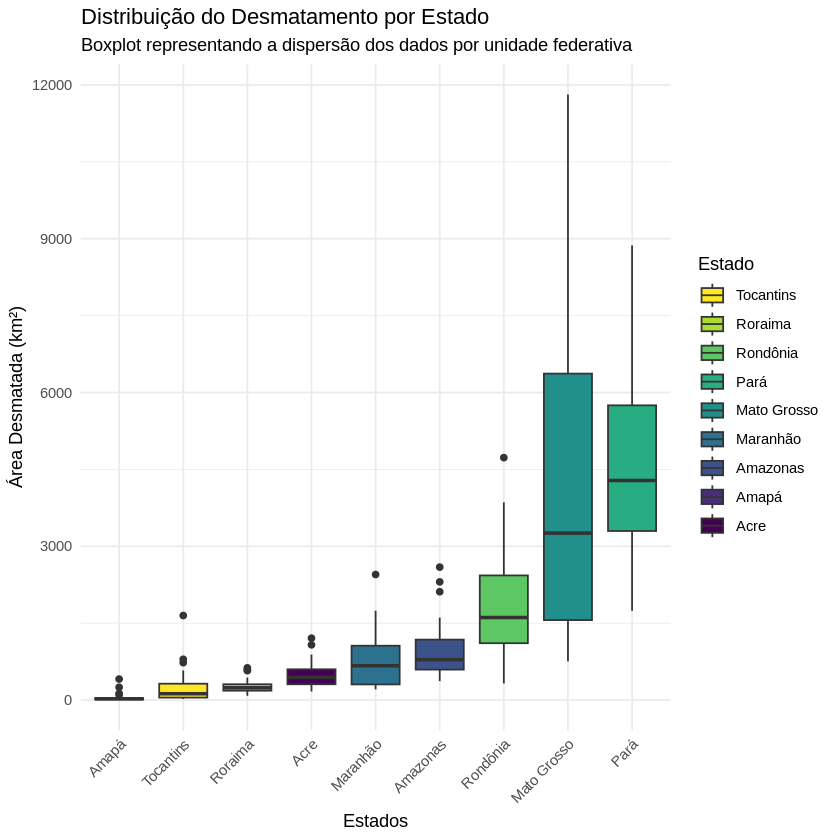

In [ ]:
ggplot(dt.desmac, aes(x = reorder(uf, area.km., FUN = median), y = area.km., fill = uf)) +
  geom_boxplot() +
  scale_fill_viridis_d() +
  theme_minimal() +
  labs(
    x = "Estados",
    y = "Área Desmatada (km²)",
    title = "Distribuição do Desmatamento por Estado",
    subtitle = "Boxplot representando a dispersão dos dados por unidade federativa",
    fill = "Estado"
  ) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  guides(fill = guide_legend(reverse = TRUE))

#Informações por Cidades e Estados - Instituto Brasileiro de Geografia e Estatística Análise Proporção

In [ ]:
df.paraIBGE <- data.frame(
  Estado = "Pará",
  Area_Territorial_km2 = 1245870.242,
  Populacao_Residente = 8120131,
  IDH = 0.69,
  Ano_Area_Territorial = 2023,
  Ano_Populacao = 2022,
  Ano_IDH = 2021
)

In [ ]:
df.acreIBGE <- data.frame(
  Estado = "Acre",
  Area_Territorial_km2 = 164173.525,
  Populacao_Residente = 830018,
  IDH = 0.71,
  Ano_Area_Territorial = 2023,
  Ano_Populacao = 2022,
  Ano_IDH = 2021
)

In [ ]:
df.amazonasIBGE <- data.frame(
  Estado = "Amazonas",
  Area_Territorial_km2 = 1559256.365,
  Populacao_Residente = 3941613,
  IDH = 0.70,
  Ano_Area_Territorial = 2023,
  Ano_Populacao = 2022,
  Ano_IDH = 2021
)

In [ ]:
df.maranhaoIBGE <- data.frame(
  Estado = "Maranhão",
  Area_Territorial_km2 = 329651.495,
  Populacao_Residente = 6776699,
  IDH = 0.676,
  Ano_Area_Territorial = 2023,
  Ano_Populacao = 2022,
  Ano_IDH = 2021
)

In [ ]:
df.matogrossoIBGE <- data.frame(
  Estado = "Mato Grosso",
  Area_Territorial_km2 = 903208.362,
  Populacao_Residente = 3658649,
  IDH = 0.736,
  Ano_Area_Territorial = 2023,
  Ano_Populacao = 2022,
  Ano_IDH = 2021
)

In [ ]:
df.rondoniaIBGE <- data.frame(
  Estado = "Rondônia",
  Area_Territorial_km2 = 237754.171,
  Populacao_Residente = 1581196,
  IDH = 0.70,
  Ano_Area_Territorial = 2023,
  Ano_Populacao = 2022,
  Ano_IDH = 2021
)

In [ ]:
df.roraimaIBGE <- data.frame(
  Estado = "Roraima",
  Area_Territorial_km2 = 223644.534,
  Populacao_Residente = 636707,
  IDH = 0.699,
  Ano_Area_Territorial = 2023,
  Ano_Populacao = 2022,
  Ano_IDH = 2021
)

In [ ]:
df.tocantinsIBGE <- data.frame(
  Estado = "Tocantins",
  Area_Territorial_km2 = 277423.627,
  Populacao_Residente = 1511460,
  IDH = 0.731,
  Ano_Area_Territorial = 2023,
  Ano_Populacao = 2022,
  Ano_IDH = 2021
)

In [ ]:
df.amapaIBGE <- data.frame(
  Estado = "Amapá",
  Area_Territorial_km2 = 142470.762,
  Populacao_Residente = 733759,
  IDH = 0.688,
  Ano_Area_Territorial = 2023,
  Ano_Populacao = 2022,
  Ano_IDH = 2021
)

In [ ]:
dt.IBGE<- rbind(df.paraIBGE, df.acreIBGE, df.amazonasIBGE, df.amapaIBGE, df.maranhaoIBGE, df.matogrossoIBGE, df.rondoniaIBGE, df.roraimaIBGE, df.tocantinsIBGE)

In [ ]:
dt.IBGE

Estado,Area_Territorial_km2,Populacao_Residente,IDH,Ano_Area_Territorial,Ano_Populacao,Ano_IDH
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Pará,1245870.2,8120131,0.690,2023,2022,2021
Acre,164173.5,830018,0.710,2023,2022,2021
Amazonas,1559256.4,3941613,0.700,2023,2022,2021
Amapá,142470.8,733759,0.688,2023,2022,2021
Maranhão,329651.5,6776699,0.676,2023,2022,2021
Mato Grosso,903208.4,3658649,0.736,2023,2022,2021
Rondônia,237754.2,1581196,0.700,2023,2022,2021
Roraima,223644.5,636707,0.699,2023,2022,2021
Tocantins,277423.6,1511460,0.731,2023,2022,2021


In [ ]:
summary(dt.IBGE)

    Estado          Area_Territorial_km2 Populacao_Residente      IDH        
 Length:9           Min.   : 142471      Min.   : 636707     Min.   :0.6760  
 Class :character   1st Qu.: 223644      1st Qu.: 830018     1st Qu.:0.6900  
 Mode  :character   Median : 277424      Median :1581196     Median :0.7000  
                    Mean   : 564828      Mean   :3087804     Mean   :0.7033  
                    3rd Qu.: 903208      3rd Qu.:3941613     3rd Qu.:0.7100  
                    Max.   :1559256      Max.   :8120131     Max.   :0.7360  
 Ano_Area_Territorial Ano_Populacao     Ano_IDH    
 Min.   :2023         Min.   :2022   Min.   :2021  
 1st Qu.:2023         1st Qu.:2022   1st Qu.:2021  
 Median :2023         Median :2022   Median :2021  
 Mean   :2023         Mean   :2022   Mean   :2021  
 3rd Qu.:2023         3rd Qu.:2022   3rd Qu.:2021  
 Max.   :2023         Max.   :2022   Max.   :2021  

#Pará (Nova)

In [ ]:
df.para$prop.area <- df.para$area.km. / df.paraIBGE$Area_Territorial_km2

In [ ]:
head(df.para)

,year,area.km.,uf,prop.area
,<int>,<dbl>,<chr>,<dbl>
4,2024,2362,Pará,0.001895864
10,2023,3299,Pará,0.002647948
22,2022,4162,Pará,0.003340637
31,2021,5238,Pará,0.004204290
40,2020,4899,Pará,0.003932191
49,2019,4172,Pará,0.003348663


In [ ]:
df.para$naDesmac <- df.paraIBGE$Area_Territorial_km2 - df.para$area.km.

In [ ]:
pa.total <- sum(df.paraIBGE$Area_Territorial_km2, na.rm = TRUE)

In [ ]:
pa.desmac <- sum(df.para$area.km., na.rm = TRUE)

In [ ]:
pa.naoDesmac <- pa.total - pa.desmac

In [ ]:
pa.pizza <- data.frame(
  Categoria = c("Área Desmatada", "Área Não Desmatada"),
  Area = c(pa.desmac, pa.naoDesmac)
)

In [ ]:
library(ggplot2)

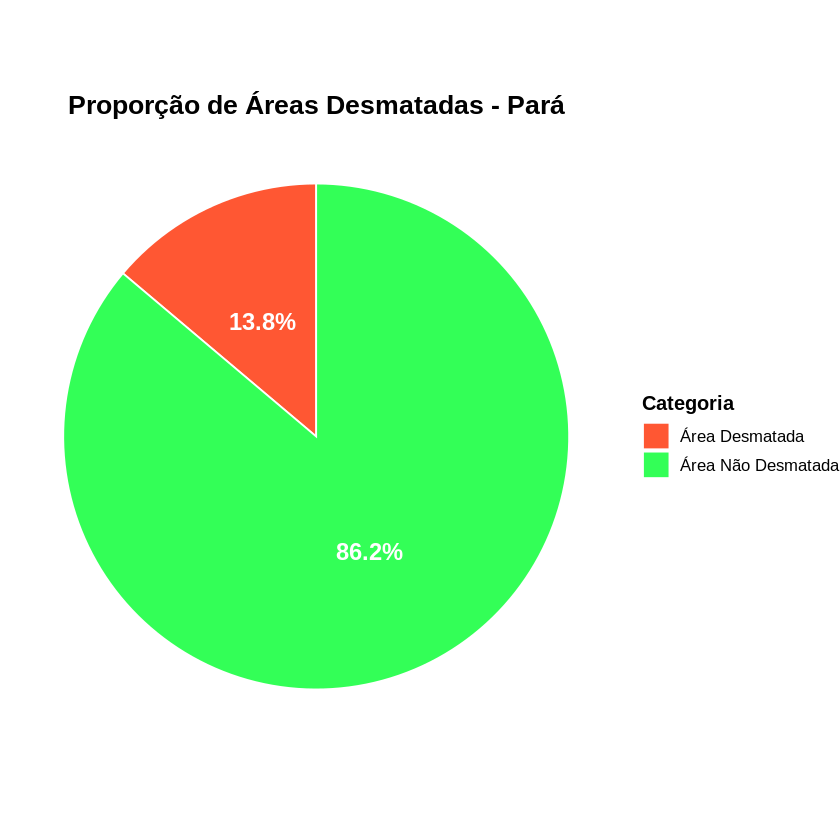

In [ ]:
ggplot(pa.pizza, aes(x = "", y = Area, fill = Categoria)) +
  geom_bar(stat = "identity", width = 1, color = "white") +
  coord_polar("y", start = 0) +
  labs(title = "Proporção de Áreas Desmatadas - Pará") +
  theme_void() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
    legend.title = element_text(size = 12, face = "bold"),
    legend.text = element_text(size = 10)
  ) +
  scale_fill_manual(values = c("#FF5733", "#33FF57")) +
  geom_text(aes(label = paste0(round(100 * Area / sum(Area), 1), "%")),
            position = position_stack(vjust = 0.5),
            color = "white", size = 5, fontface = "bold")

#Acre (Nova)

In [ ]:
df.acre$prop.area <- df.acre$area.km. / df.acreIBGE$Area_Territorial_km2

In [ ]:
head(df.acre)

,year,area.km.,uf,prop.area
,<int>,<dbl>,<chr>,<dbl>
9,2024,448,Acre,0.002728820
18,2023,601,Acre,0.003660761
25,2022,840,Acre,0.005116538
36,2021,889,Acre,0.005415002
45,2020,706,Acre,0.004300328
54,2019,682,Acre,0.004154141


In [ ]:
df.acre$naDesmac <- df.acreIBGE$Area_Territorial_km2 - df.acre$area.km.

In [ ]:
ac.total <- sum(df.acreIBGE$Area_Territorial_km2, na.rm = TRUE)

In [ ]:
ac.desmac <- sum(df.acre$area.km., na.rm = TRUE)

In [ ]:
ac.naoDesmac <- ac.total - ac.desmac

In [ ]:
ac.pizza <- data.frame(
  Categoria = c("Área Desmatada", "Área Não Desmatada"),
  Area = c(ac.desmac, ac.naoDesmac)
)

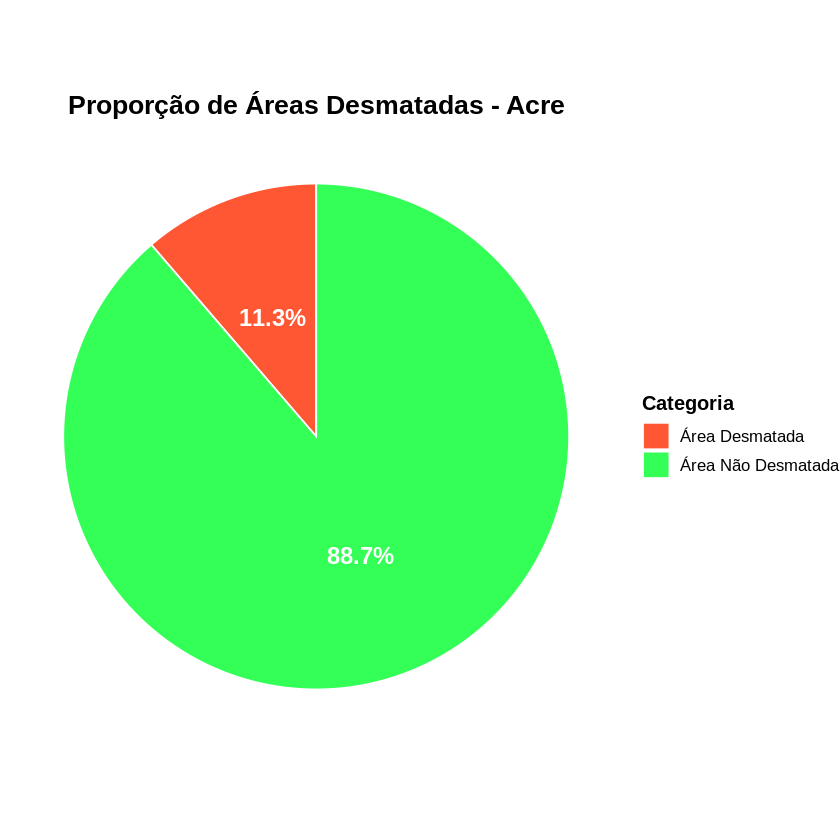

In [ ]:
ggplot(ac.pizza, aes(x = "", y = Area, fill = Categoria)) +
  geom_bar(stat = "identity", width = 1, color = "white") +
  coord_polar("y", start = 0) +
  labs(title = "Proporção de Áreas Desmatadas - Acre") +
  theme_void() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
    legend.title = element_text(size = 12, face = "bold"),
    legend.text = element_text(size = 10)
  ) +
  scale_fill_manual(values = c("#FF5733", "#33FF57")) +
  geom_text(aes(label = paste0(round(100 * Area / sum(Area), 1), "%")),
            position = position_stack(vjust = 0.5),
            color = "white", size = 5, fontface = "bold")

#Amazonas (Nova)

In [ ]:
df.amazonas$prop.area <- df.amazonas$area.km. / df.amazonasIBGE$Area_Territorial_km2

In [ ]:
am.total <- sum(df.amazonasIBGE$Area_Territorial_km2, na.rm = TRUE)

In [ ]:
am.desmac <- sum(df.amazonas$area.km., na.rm = TRUE)

In [ ]:
am.naoDesmac <- am.total - am.desmac

In [ ]:
am.pizza <- data.frame(
  Categoria = c("Área Desmatada", "Área Não Desmatada"),
  Area = c(am.desmac, am.naoDesmac)
)

In [ ]:
head(df.amazonas)

,year,area.km.,uf,prop.area
,<int>,<dbl>,<chr>,<dbl>
8,2024,1143,Amazonas,0.0007330417
17,2023,1610,Amazonas,0.0010325435
26,2022,2594,Amazonas,0.0016636135
35,2021,2306,Amazonas,0.0014789101
44,2020,1512,Amazonas,0.0009696930
53,2019,1434,Amazonas,0.0009196692


In [ ]:
head(am.pizza)

,Categoria,Area
,<chr>,<dbl>
1,Área Desmatada,36137
2,Área Não Desmatada,1523119


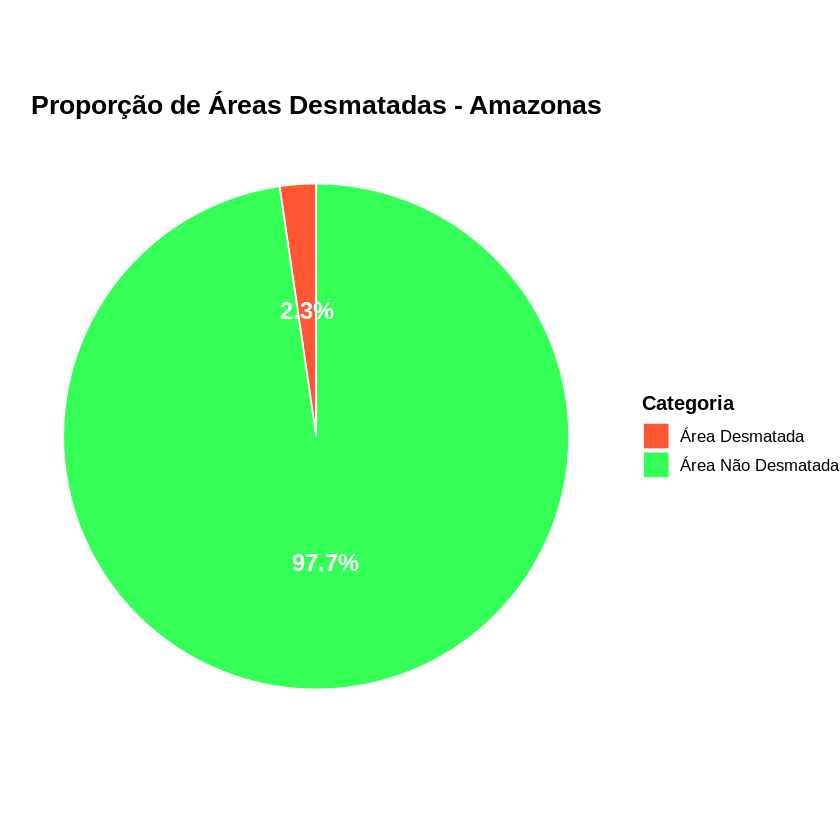

In [ ]:
ggplot(am.pizza, aes(x = "", y = Area, fill = Categoria)) +
  geom_bar(stat = "identity", width = 1, color = "white") +
  coord_polar("y", start = 0) +
  labs(title = "Proporção de Áreas Desmatadas - Amazonas") +
  theme_void() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
    legend.title = element_text(size = 12, face = "bold"),
    legend.text = element_text(size = 10)
  ) +
  scale_fill_manual(values = c("#FF5733", "#33FF57")) +
  geom_text(aes(label = paste0(round(100 * Area / sum(Area), 1), "%")),
            position = position_stack(vjust = 0.5),
            color = "white", size = 5, fontface = "bold")

#Maranhão (Nova)

In [ ]:
df.maranhao$prop.area <- df.maranhao$area.km. / df.maranhaoIBGE$Area_Territorial_km2

In [ ]:
ma.total <- sum(df.maranhaoIBGE$Area_Territorial_km2, na.rm = TRUE)

In [ ]:
ma.desmac <- sum(df.maranhao$area.km., na.rm = TRUE)

In [ ]:
ma.naoDesmac <- ma.total - ma.desmac

In [ ]:
ma.pizza <- data.frame(
  Categoria = c("Área Desmatada", "Área Não Desmatada"),
  Area = c(ma.desmac, ma.naoDesmac)
)

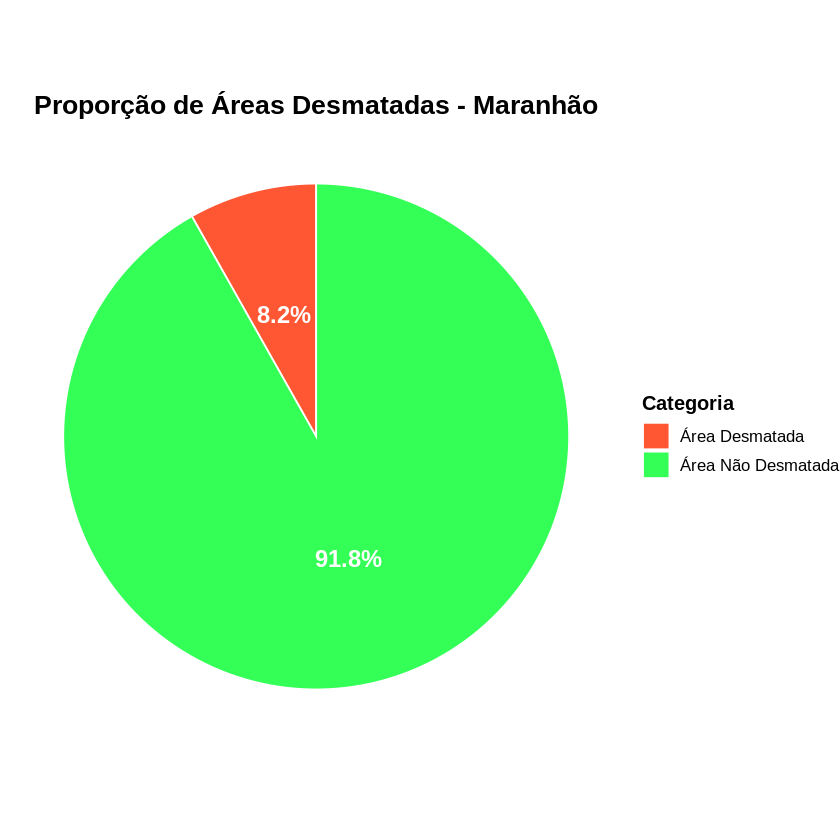

In [ ]:
ggplot(ma.pizza, aes(x = "", y = Area, fill = Categoria)) +
  geom_bar(stat = "identity", width = 1, color = "white") +
  coord_polar("y", start = 0) +
  labs(title = "Proporção de Áreas Desmatadas - Maranhão") +
  theme_void() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
    legend.title = element_text(size = 12, face = "bold"),
    legend.text = element_text(size = 10)
  ) +
  scale_fill_manual(values = c("#FF5733", "#33FF57")) +
  geom_text(aes(label = paste0(round(100 * Area / sum(Area), 1), "%")),
            position = position_stack(vjust = 0.5),
            color = "white", size = 5, fontface = "bold")

#Mato Grosso (Nova)

In [ ]:
df.matogrosso$prop.area <- df.matogrosso$area.km. / df.matogrossoIBGE$Area_Territorial_km2

In [ ]:
mt.total <- sum(df.matogrossoIBGE$Area_Territorial_km2, na.rm = TRUE)

In [ ]:
mt.desmac <- sum(df.matogrosso$area.km., na.rm = TRUE)

In [ ]:
mt.naoDesmac <- mt.total - mt.desmac

In [ ]:
mt.pizza <- data.frame(
  Categoria = c("Área Desmatada", "Área Não Desmatada"),
  Area = c(mt.desmac, mt.naoDesmac)
)

In [ ]:
head(df.matogrosso)

,year,area.km.,uf,prop.area
,<int>,<dbl>,<chr>,<dbl>
5,2024,1264,Mato Grosso,0.001399456
14,2023,2048,Mato Grosso,0.002267472
23,2022,1927,Mato Grosso,0.002133505
32,2021,2213,Mato Grosso,0.002450154
41,2020,1779,Mato Grosso,0.001969645
50,2019,1702,Mato Grosso,0.001884394


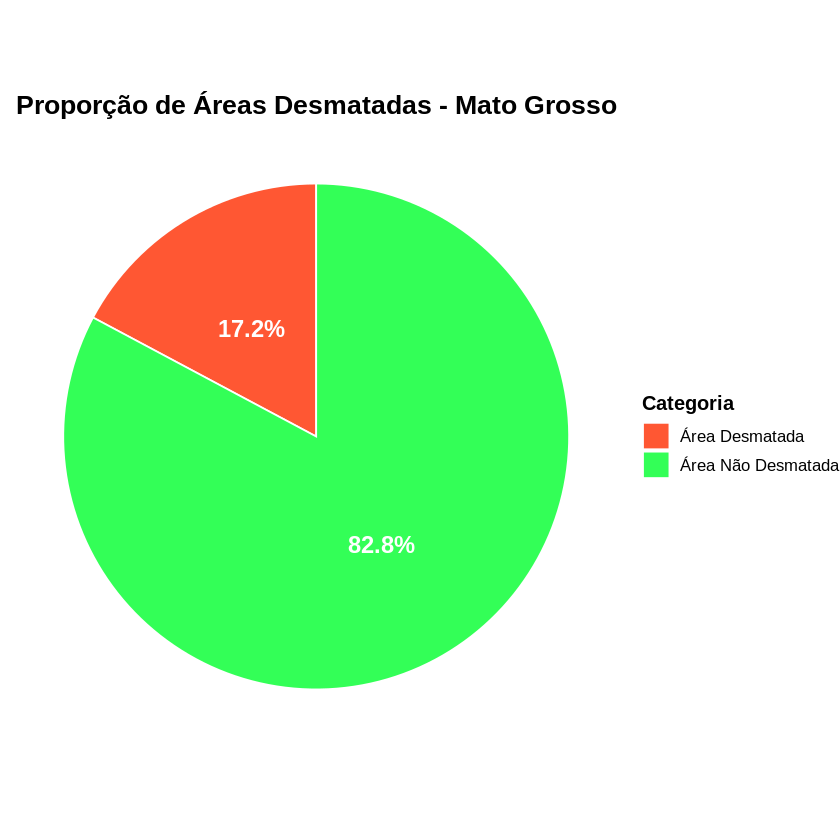

In [ ]:
ggplot(mt.pizza, aes(x = "", y = Area, fill = Categoria)) +
  geom_bar(stat = "identity", width = 1, color = "white") +
  coord_polar("y", start = 0) +
  labs(title = "Proporção de Áreas Desmatadas - Mato Grosso") +
  theme_void() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
    legend.title = element_text(size = 12, face = "bold"),
    legend.text = element_text(size = 10)
  ) +
  scale_fill_manual(values = c("#FF5733", "#33FF57")) +
  geom_text(aes(label = paste0(round(100 * Area / sum(Area), 1), "%")),
            position = position_stack(vjust = 0.5),
            color = "white", size = 5, fontface = "bold")

#Amapa (Nova)

In [ ]:
df.amapa$prop.area <- df.amapa$area.km. / df.amapaIBGE$Area_Territorial_km2

In [ ]:
ap.total <- sum(df.amapaIBGE$Area_Territorial_km2, na.rm = TRUE)

In [ ]:
ap.desmac <- sum(df.amapa$area.km., na.rm = TRUE)

In [ ]:
ap.naoDesmac <- ap.total - ap.desmac

In [ ]:
ap.pizza <- data.frame(
  Categoria = c("Área Desmatada", "Área Não Desmatada"),
  Area = c(ap.desmac, ap.naoDesmac)
)

In [ ]:
head(df.amapa)

,year,area.km.,uf,prop.area
,<int>,<dbl>,<chr>,<dbl>
7,2024,0,Amapá,0.000000e+00
16,2023,17,Amapá,1.193227e-04
27,2022,14,Amapá,9.826578e-05
34,2021,17,Amapá,1.193227e-04
43,2020,24,Amapá,1.684556e-04
46,2019,32,Amapá,2.246075e-04


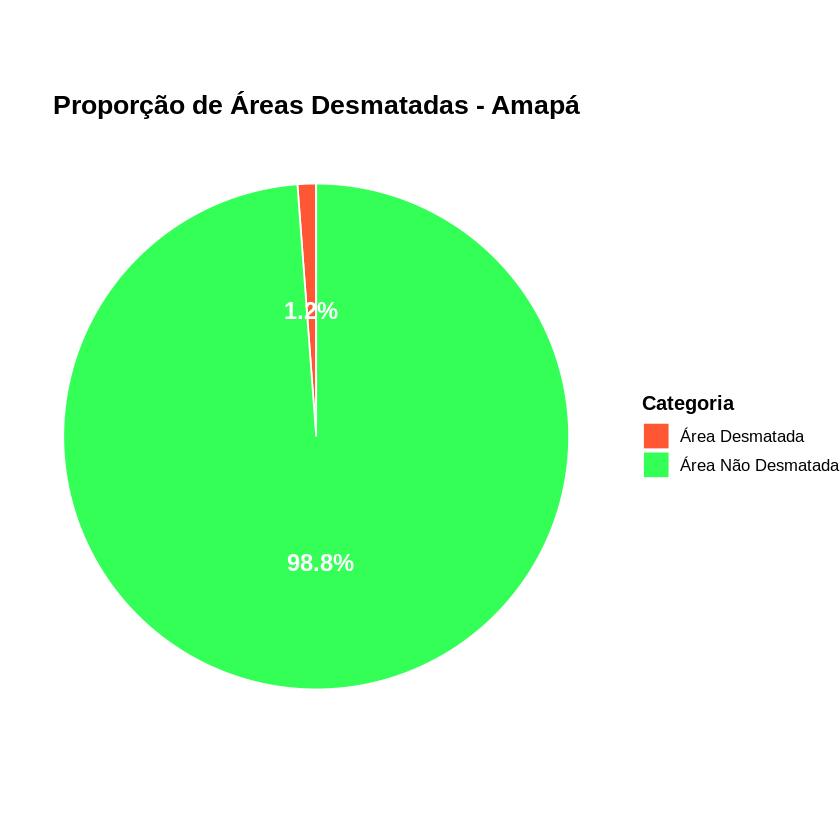

In [ ]:
ggplot(ap.pizza, aes(x = "", y = Area, fill = Categoria)) +
  geom_bar(stat = "identity", width = 1, color = "white") +
  coord_polar("y", start = 0) +
  labs(title = "Proporção de Áreas Desmatadas - Amapá") +
  theme_void() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
    legend.title = element_text(size = 12, face = "bold"),
    legend.text = element_text(size = 10)
  ) +
  scale_fill_manual(values = c("#FF5733", "#33FF57")) +
  geom_text(aes(label = paste0(round(100 * Area / sum(Area), 1), "%")),
            position = position_stack(vjust = 0.5),
            color = "white", size = 5, fontface = "bold")

#Rondônia (Nova)

In [ ]:
df.rondonia$prop.area <- df.rondonia$area.km. / df.rondoniaIBGE$Area_Territorial_km2

In [ ]:
ro.total <- sum(df.rondoniaIBGE$Area_Territorial_km2, na.rm = TRUE)

In [ ]:
ro.desmac <- sum(df.rondonia$area.km., na.rm = TRUE)

In [ ]:
ro.naoDesmac <- ro.total - ro.desmac

In [ ]:
ro.pizza <- data.frame(
  Categoria = c("Área Desmatada", "Área Não Desmatada"),
  Area = c(ro.desmac, ro.naoDesmac)
)

In [ ]:
head(df.rondonia)

,year,area.km.,uf,prop.area
,<int>,<dbl>,<chr>,<dbl>
3,2024,325,Rondônia,0.001366958
12,2023,867,Rondônia,0.003646624
21,2022,1480,Rondônia,0.006224917
30,2021,1673,Rondônia,0.007036680
39,2020,1273,Rondônia,0.005354270
48,2019,1257,Rondônia,0.005286973


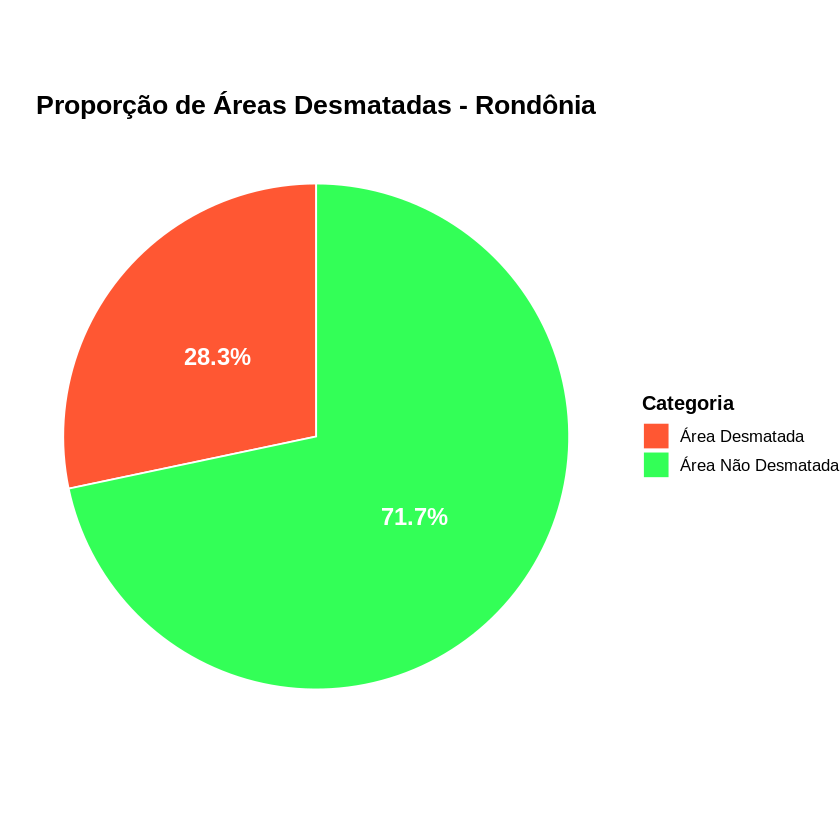

In [ ]:
ggplot(ro.pizza, aes(x = "", y = Area, fill = Categoria)) +
  geom_bar(stat = "identity", width = 1, color = "white") +
  coord_polar("y", start = 0) +
  labs(title = "Proporção de Áreas Desmatadas - Rondônia") +
  theme_void() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
    legend.title = element_text(size = 12, face = "bold"),
    legend.text = element_text(size = 10)
  ) +
  scale_fill_manual(values = c("#FF5733", "#33FF57")) +
  geom_text(aes(label = paste0(round(100 * Area / sum(Area), 1), "%")),
            position = position_stack(vjust = 0.5),
            color = "white", size = 5, fontface = "bold")

#Roraima (Nova)

In [ ]:
df.roraima$prop.area <- df.roraima$area.km. / df.roraimaIBGE$Area_Territorial_km2

In [ ]:
rr.total <- sum(df.roraimaIBGE$Area_Territorial_km2, na.rm = TRUE)

In [ ]:
rr.desmac <- sum(df.roraima$area.km., na.rm = TRUE)

In [ ]:
rr.naoDesmac <- rr.total - rr.desmac

In [ ]:
rr.pizza <- data.frame(
  Categoria = c("Área Desmatada", "Área Não Desmatada"),
  Area = c(rr.desmac, rr.naoDesmac)
)

In [ ]:
head(df.roraima)

,year,area.km.,uf,prop.area
,<int>,<dbl>,<chr>,<dbl>
2,2024,436,Roraima,0.001949522
11,2023,284,Roraima,0.001269872
20,2022,279,Roraima,0.001247515
29,2021,315,Roraima,0.001408485
38,2020,297,Roraima,0.001328000
47,2019,590,Roraima,0.002638115


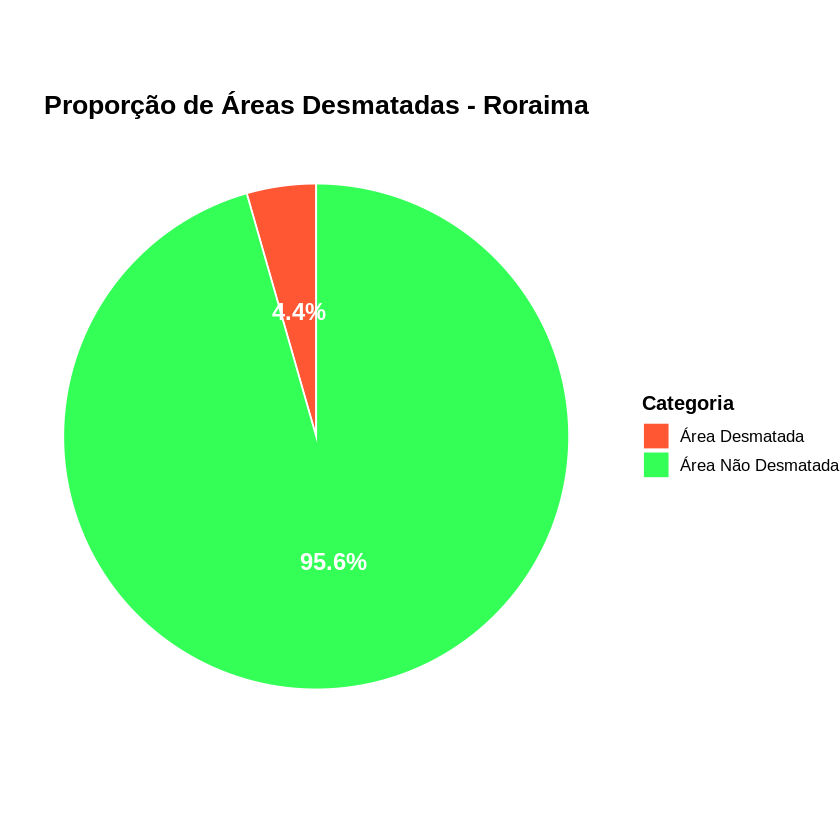

In [ ]:
ggplot(rr.pizza, aes(x = "", y = Area, fill = Categoria)) +
  geom_bar(stat = "identity", width = 1, color = "white") +
  coord_polar("y", start = 0) +
  labs(title = "Proporção de Áreas Desmatadas - Roraima") +
  theme_void() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
    legend.title = element_text(size = 12, face = "bold"),
    legend.text = element_text(size = 10)
  ) +
  scale_fill_manual(values = c("#FF5733", "#33FF57")) +
  geom_text(aes(label = paste0(round(100 * Area / sum(Area), 1), "%")),
            position = position_stack(vjust = 0.5),
            color = "white", size = 5, fontface = "bold")

#Tocantins (Nova)

In [ ]:
df.tocantins$prop.area <- df.tocantins$area.km. / df.tocantinsIBGE$Area_Territorial_km2

In [ ]:
to.total <- sum(df.tocantinsIBGE$Area_Territorial_km2, na.rm = TRUE)

In [ ]:
to.desmac <- sum(df.tocantins$area.km., na.rm = TRUE)

In [ ]:
to.naoDesmac <- to.total - to.desmac

In [ ]:
to.pizza <- data.frame(
  Categoria = c("Área Desmatada", "Área Não Desmatada"),
  Area = c(to.desmac, to.naoDesmac)
)

In [ ]:
head(df.tocantins)

,year,area.km.,uf,prop.area
,<int>,<dbl>,<chr>,<dbl>
1,2024,23,Tocantins,8.290570e-05
13,2023,32,Tocantins,1.153471e-04
19,2022,27,Tocantins,9.732408e-05
28,2021,37,Tocantins,1.333700e-04
37,2020,25,Tocantins,9.011489e-05
52,2019,23,Tocantins,8.290570e-05


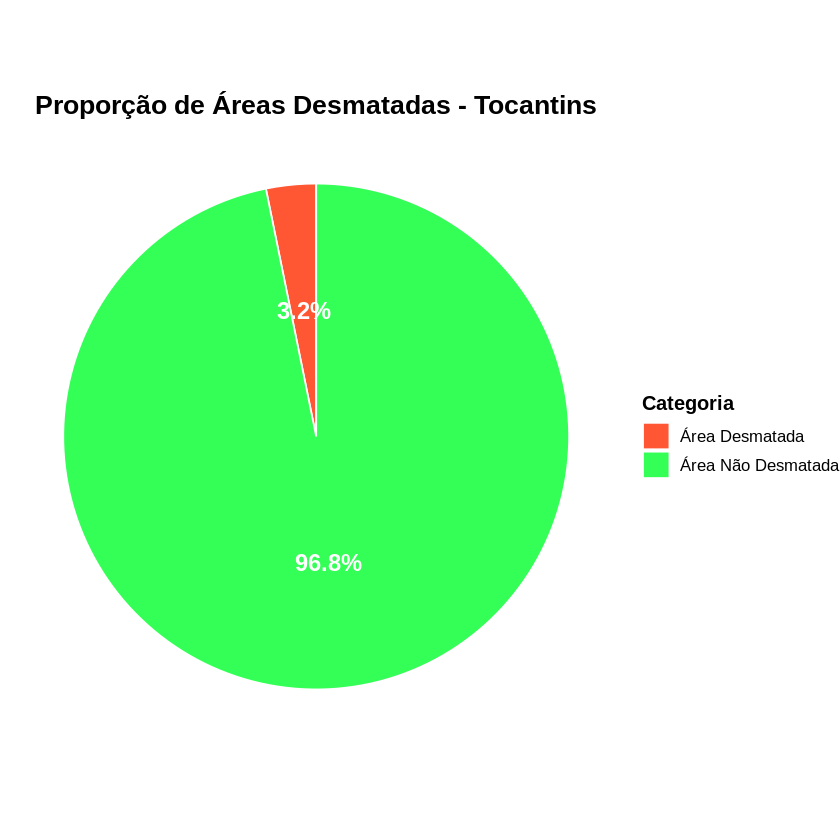

In [ ]:
ggplot(to.pizza, aes(x = "", y = Area, fill = Categoria)) +
  geom_bar(stat = "identity", width = 1, color = "white") +
  coord_polar("y", start = 0) +
  labs(title = "Proporção de Áreas Desmatadas - Tocantins") +
  theme_void() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
    legend.title = element_text(size = 12, face = "bold"),
    legend.text = element_text(size = 10)
  ) +
  scale_fill_manual(values = c("#FF5733", "#33FF57")) +
  geom_text(aes(label = paste0(round(100 * Area / sum(Area), 1), "%")),
            position = position_stack(vjust = 0.5),
            color = "white", size = 5, fontface = "bold")

In [ ]:
dt.populacao <- dt.IBGE[, c("Estado", "Populacao_Residente")]

In [ ]:
dt.populacao

Estado,Populacao_Residente
<chr>,<dbl>
Pará,8120131
Acre,830018
Amazonas,3941613
Amapá,733759
Maranhão,6776699
Mato Grosso,3658649
Rondônia,1581196
Roraima,636707
Tocantins,1511460


In [ ]:
summary(dt.populacao$Populacao_Residente)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 636707  830018 1581196 3087804 3941613 8120131 